In [135]:
import glob
import os
import re
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [445]:
file_dir_list = os.listdir()
# file_dir_list = [i for i in file_dir_list if not ( i.startswith('.') or i.endswith('.ipynb') or i.endswith('.xls') or i.endswith('.txt'))]
file_dir_list = [i for i in file_dir_list if re.search(r'(\d+-\d+)',i) ]
file_dir_list

['20180510-1',
 '20180604-1',
 '20180704-2',
 '20180709-1',
 '20180716-1',
 '20180718-1',
 '20180730-1',
 '20180910-1',
 '20180917-1',
 '20181011-1',
 '20181119-1',
 '20181210-2',
 '20190117-1',
 '20190125-1',
 '20190220-1',
 '20190312-1',
 '20190410-2',
 '20190425-1',
 '20190509-1',
 '20190529-2',
 '20190604-1',
 '20190704-1']

In [446]:
#获取当前文件夹下的所有目录及其目录里的文件

file_list = []
for i in file_dir_list:
    file_list1 = glob.glob('.\%s\*.txt'%i)
    file_list.extend(file_list1)
file_list

['.\\20180510-1\\res-IonXpress_055_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180510-1\\res-IonXpress_057_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180510-1\\res-IonXpress_060_rawlib.bam_grepCHR16_20w.txt',
 '.\\20180604-1\\result-IonXpress_005_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_006_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_009_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_010_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_011_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_078_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_079_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_080_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_081_rawlib.bam.txt',
 '.\\20180604-1\\result-IonXpress_082_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_024_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_027_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_031_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpress_035_rawlib.bam.txt',
 '.\\20180704-2\\result-IonXpres

In [447]:
len(file_list)

88

In [448]:
#根据 barcode和日期 得到 对应barcode的PGD的结果
pgd_data = pd.read_excel('res.xls')[[3,'PGD结果','日期']].fillna(value=' ')
pgd_data.head()

,3,PGD结果,日期
0,16,未匹配到,
1,接头,未匹配到,
2,81,未匹配到,
3,82,--SEA/ α α,20190117-1
4,83,未匹配到,


In [449]:
#根据 barcode和日期 得到2018年 对应barcode的PGD的结果
pgd_data2 = pd.read_excel('res-2.xls')[[3,'PGD结果','日期']].fillna(value=' ')
pgd_data2.head()

,3,PGD结果,日期
0,22,未匹配到,
1,接头,未匹配到,
2,45,未匹配到,
3,46,未匹配到,
4,47,未匹配到,


In [450]:
#方法一
results1 = pgd_data[[3,'PGD结果','日期']][(pgd_data['日期'] != ' ')].copy()
results1

,3,PGD结果,日期
3,82,--SEA/ α α,20190117-1
40,90,αα/αα,20190125-1
41,91,--SEA/--SEA,20190125-1
42,92,--SEA/--SEA,20190125-1
43,93,--SEA/ α α,20190125-1
44,94,--SEA/ α α,20190125-1
45,95,αα/αα,20190125-1
46,96,--SEA/ α α,20190125-1
48,2,--SEA/--SEA,20190125-1
51,5,αWSα/αα,20190125-1


In [451]:
results2 = pgd_data2[[3,'PGD结果','日期']][(pgd_data2['日期'] != ' ')].copy()
results2

,3,PGD结果,日期
68,33,--SEA/-α3.7,20180314-1
69,34,--SEA/-α3.7,20180314-1
135,55,α α / α α,20180510-1
137,57,α α / α α,20180510-1
140,60,--SEA/ α α,20180510-1
169,78,--SEA/ α α,20180604-1
170,79,α α / α α,20180604-1
171,80,--SEA/ α α,20180604-1
172,81,--SEA/--SEA,20180604-1
173,82,--SEA/--SEA,20180604-1


In [452]:
results = pd.concat([results2,results1],join='outer',ignore_index=True)
results

,3,PGD结果,日期
0,33,--SEA/-α3.7,20180314-1
1,34,--SEA/-α3.7,20180314-1
2,55,α α / α α,20180510-1
3,57,α α / α α,20180510-1
4,60,--SEA/ α α,20180510-1
5,78,--SEA/ α α,20180604-1
6,79,α α / α α,20180604-1
7,80,--SEA/ α α,20180604-1
8,81,--SEA/--SEA,20180604-1
9,82,--SEA/--SEA,20180604-1


In [453]:
results['PGD结果'].unique()

array([' --SEA/-α3.7', 'α α / α α', '--SEA/ α α', '--SEA/--SEA', 'αα/αα',
       'αWSα/--SEA', 'αα /αα', 'ααWS/-α3.7', ' -α4.2/αα', '--SEA /αα',
       'αα/αWSα', ' -α3.7/αα', 'αWSα/αα', 'αQSα/αα？', ' --SEA/αCSα'],
      dtype=object)

In [454]:
targets_dict = {'α α / α α':2,'αα/αα':2,'αα /αα':2,' --SEA/-α3.7':3,'--SEA/ α α':4,'--SEA/--SEA':5,'αWSα/--SEA':4,'ααWS/-α3.7':6, ' -α4.2/αα':7,'--SEA /αα':4,'αα/αWSα':2,' -α3.7/αα':6,'αWSα/αα':2,'αQSα/αα？':2,' --SEA/αCSα':4}
targets_dict

{'α α / α α': 2,
 'αα/αα': 2,
 'αα /αα': 2,
 ' --SEA/-α3.7': 3,
 '--SEA/ α α': 4,
 '--SEA/--SEA': 5,
 'αWSα/--SEA': 4,
 'ααWS/-α3.7': 6,
 ' -α4.2/αα': 7,
 '--SEA /αα': 4,
 'αα/αWSα': 2,
 ' -α3.7/αα': 6,
 'αWSα/αα': 2,
 'αQSα/αα？': 2,
 ' --SEA/αCSα': 4}

In [455]:
#获取映射的PGD数字结果
target_dict_num = {}
for i in range(len(results.index.values)):
    date = results.loc[i]['日期']
    barcode = results.loc[i][3]
    pgd_res = results.loc[i]['PGD结果']
    target_dict_num['sample_%s_%.3d'%(date,barcode)] = targets_dict[pgd_res]
target_dict_num

{'sample_20180314-1_033': 3,
 'sample_20180314-1_034': 3,
 'sample_20180510-1_055': 2,
 'sample_20180510-1_057': 2,
 'sample_20180510-1_060': 4,
 'sample_20180604-1_078': 4,
 'sample_20180604-1_079': 2,
 'sample_20180604-1_080': 4,
 'sample_20180604-1_081': 5,
 'sample_20180604-1_082': 5,
 'sample_20180604-1_005': 2,
 'sample_20180604-1_006': 2,
 'sample_20180604-1_009': 4,
 'sample_20180604-1_010': 4,
 'sample_20180604-1_011': 4,
 'sample_20180704-2_024': 4,
 'sample_20180704-2_027': 2,
 'sample_20180704-2_031': 4,
 'sample_20180704-2_035': 4,
 'sample_20180704-2_036': 4,
 'sample_20180709-1_059': 2,
 'sample_20180716-1_039': 3,
 'sample_20180716-1_040': 3,
 'sample_20180718-1_047': 2,
 'sample_20180718-1_048': 4,
 'sample_20180718-1_049': 4,
 'sample_20180718-1_050': 4,
 'sample_20180718-1_051': 2,
 'sample_20180718-1_052': 4,
 'sample_20180730-1_090': 6,
 'sample_20180910-1_004': 7,
 'sample_20180910-1_005': 2,
 'sample_20180917-1_022': 4,
 'sample_20180917-1_023': 4,
 'sample_20180

In [149]:
# 创建深度模板区间
temp_Position_range = np.arange(71277,336702)
temp_deep_range = np.arange(0,265425)
template_df = DataFrame(index=temp_Position_range)
template_df['template_sample']=temp_deep_range
template_df

,template_sample
71277,0
71278,1
71279,2
71280,3
71281,4
71282,5
71283,6
71284,7
71285,8
71286,9


In [52]:
# 测试单个样本
# sample1 = pd.read_csv(r'.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',sep='\t',header=None,index_col=0,names=['deep'])
# sample1
# merge_res = template_df.join(sample1)
# display(sample1,merge_res)

In [456]:
%%time
#对之前的级联每个样本做优化，极大幅度提高了运行速度，合并所有样本到模板,并计算运行时间，
merge_res = template_df.copy()
for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
    sample_name = 'sample_%s_%s'%(dateX,barcodeX)
    sampleX = pd.read_csv(i,sep='\t',header=None,index_col=0,names=[sample_name])

    merge_res = merge_res.join(sampleX)

Wall time: 40.5 s


In [457]:
merge_res

,template_sample,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,sample_20180604-1_010,sample_20180604-1_011,sample_20180604-1_078,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
71277,0,85.0,38.0,94.0,36.0,90.0,28.0,58.0,21.0,146.0,...,382.0,81.0,191.0,168.0,90.0,66.0,145.0,248.0,244.0,114.0
71278,1,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71279,2,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71280,3,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,148.0,...,384.0,82.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71281,4,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71282,5,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71283,6,47.0,20.0,43.0,24.0,69.0,21.0,43.0,17.0,110.0,...,295.0,71.0,156.0,139.0,82.0,59.0,118.0,191.0,195.0,80.0
71284,7,86.0,38.0,101.0,36.0,91.0,28.0,61.0,21.0,148.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71285,8,86.0,38.0,102.0,36.0,91.0,28.0,61.0,21.0,148.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71286,9,84.0,38.0,100.0,36.0,88.0,28.0,61.0,22.0,146.0,...,384.0,84.0,192.0,171.0,91.0,70.0,149.0,252.0,247.0,113.0


In [458]:
merge_res_test = merge_res.iloc[:,1:].copy()
merge_res_test

,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,sample_20180604-1_010,sample_20180604-1_011,sample_20180604-1_078,sample_20180604-1_079,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
71277,85.0,38.0,94.0,36.0,90.0,28.0,58.0,21.0,146.0,80.0,...,382.0,81.0,191.0,168.0,90.0,66.0,145.0,248.0,244.0,114.0
71278,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71279,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71280,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,148.0,81.0,...,384.0,82.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71281,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71282,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71283,47.0,20.0,43.0,24.0,69.0,21.0,43.0,17.0,110.0,59.0,...,295.0,71.0,156.0,139.0,82.0,59.0,118.0,191.0,195.0,80.0
71284,86.0,38.0,101.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71285,86.0,38.0,102.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71286,84.0,38.0,100.0,36.0,88.0,28.0,61.0,22.0,146.0,81.0,...,384.0,84.0,192.0,171.0,91.0,70.0,149.0,252.0,247.0,113.0


In [459]:
modify_data = merge_res_test.T
modify_data

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,220.0,220.0,218.0,220.0,220.0,220.0,220.0,220.0,219.0,221.0
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,108.0,108.0,106.0,108.0,108.0,108.0,108.0,108.0
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,302.0,301.0,302.0,297.0,302.0,302.0,302.0,302.0,301.0
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,164.0,164.0,164.0,163.0,163.0,163.0,162.0,162.0,162.0,161.0
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,55.0,55.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0
sample_20180604-1_009,28.0,28.0,28.0,28.0,28.0,28.0,21.0,28.0,28.0,28.0,...,87.0,87.0,84.0,87.0,87.0,87.0,87.0,86.0,86.0,86.0
sample_20180604-1_010,58.0,58.0,58.0,58.0,60.0,60.0,43.0,61.0,61.0,61.0,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
sample_20180604-1_011,21.0,21.0,21.0,21.0,21.0,21.0,17.0,21.0,21.0,22.0,...,182.0,182.0,181.0,182.0,181.0,182.0,182.0,182.0,182.0,182.0
sample_20180604-1_078,146.0,147.0,147.0,148.0,148.0,148.0,110.0,148.0,148.0,146.0,...,87.0,87.0,87.0,87.0,86.0,86.0,86.0,86.0,86.0,85.0
sample_20180604-1_079,80.0,81.0,81.0,81.0,81.0,81.0,59.0,81.0,81.0,81.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0


In [460]:
modify_data.max(axis=1)

sample_20180510-1_055    8055.0
sample_20180510-1_057    8056.0
sample_20180510-1_060    8056.0
sample_20180604-1_005    8021.0
sample_20180604-1_006    8027.0
sample_20180604-1_009    8039.0
sample_20180604-1_010    8036.0
sample_20180604-1_011    8030.0
sample_20180604-1_078    8033.0
sample_20180604-1_079    8027.0
sample_20180604-1_080    8033.0
sample_20180604-1_081    8038.0
sample_20180604-1_082    8040.0
sample_20180704-2_024    8026.0
sample_20180704-2_027    8025.0
sample_20180704-2_031    8025.0
sample_20180704-2_035    8038.0
sample_20180704-2_036    8033.0
sample_20180709-1_059    4665.0
sample_20180716-1_039    7033.0
sample_20180716-1_040    7950.0
sample_20180718-1_047    2009.0
sample_20180718-1_048    4580.0
sample_20180718-1_049    4406.0
sample_20180718-1_050    3653.0
sample_20180718-1_051    4624.0
sample_20180718-1_052    5118.0
sample_20180730-1_090    8040.0
sample_20180910-1_004    2329.0
sample_20180910-1_005    2865.0
                          ...  
sample_2

In [461]:
modify_data.max(axis=1).max()

8129.0

In [187]:
# a = np.array([[1,2,3],[4,5,6],[7,8,9]])
# b = np.array([1,2,3])
# df11 = DataFrame(data=a)
# b = b.reshape(3,1)
# display(a,b,df11)

In [467]:
coeffi = (modify_data.max(axis=1)/modify_data.max(axis=1).max()).values.reshape(88,1)

In [465]:
len(coeffi)

88

In [468]:
product_data = (modify_data.values)/coeffi

In [469]:
modify_data1 = DataFrame(data=product_data,index=modify_data.index.values,columns=modify_data.columns.values)
modify_data1

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.780881,85.780881,85.780881,85.780881,86.790068,86.790068,47.431782,86.790068,86.790068,84.771695,...,222.021105,222.021105,220.002731,222.021105,222.021105,222.021105,222.021105,222.021105,221.011918,223.030292
sample_20180510-1_057,38.344340,38.344340,38.344340,38.344340,38.344340,38.344340,20.181231,38.344340,38.344340,38.344340,...,108.978649,108.978649,108.978649,108.978649,106.960526,108.978649,108.978649,108.978649,108.978649,108.978649
sample_20180510-1_060,94.851787,95.860849,95.860849,95.860849,101.915218,101.915218,43.389647,101.915218,102.924280,100.906157,...,304.736594,304.736594,303.727532,304.736594,299.691286,304.736594,304.736594,304.736594,304.736594,303.727532
sample_20180604-1_005,36.484728,36.484728,36.484728,36.484728,36.484728,36.484728,24.323152,36.484728,36.484728,36.484728,...,166.208203,166.208203,166.208203,165.194739,165.194739,165.194739,164.181274,164.181274,164.181274,163.167810
sample_20180604-1_006,91.143640,91.143640,91.143640,91.143640,91.143640,91.143640,69.876791,92.156347,92.156347,89.118226,...,55.698891,55.698891,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598
sample_20180604-1_009,28.313472,28.313472,28.313472,28.313472,28.313472,28.313472,21.235104,28.313472,28.313472,28.313472,...,87.974002,87.974002,84.940415,87.974002,87.974002,87.974002,87.974002,86.962806,86.962806,86.962806
sample_20180604-1_010,58.671229,58.671229,58.671229,58.671229,60.694375,60.694375,43.497636,61.705948,61.705948,61.705948,...,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480
sample_20180604-1_011,21.258904,21.258904,21.258904,21.258904,21.258904,21.258904,17.209589,21.258904,21.258904,22.271233,...,184.243836,184.243836,183.231507,184.243836,183.231507,184.243836,184.243836,184.243836,184.243836,184.243836
sample_20180604-1_078,147.744803,148.756753,148.756753,149.768704,149.768704,149.768704,111.314577,149.768704,149.768704,147.744803,...,88.039711,88.039711,88.039711,88.039711,87.027760,87.027760,87.027760,87.027760,87.027760,86.015810
sample_20180604-1_079,81.016569,82.029276,82.029276,82.029276,82.029276,82.029276,59.749720,82.029276,82.029276,82.029276,...,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870


In [470]:
modify_data1.max(axis=1)

sample_20180510-1_055    8129.0
sample_20180510-1_057    8129.0
sample_20180510-1_060    8129.0
sample_20180604-1_005    8129.0
sample_20180604-1_006    8129.0
sample_20180604-1_009    8129.0
sample_20180604-1_010    8129.0
sample_20180604-1_011    8129.0
sample_20180604-1_078    8129.0
sample_20180604-1_079    8129.0
sample_20180604-1_080    8129.0
sample_20180604-1_081    8129.0
sample_20180604-1_082    8129.0
sample_20180704-2_024    8129.0
sample_20180704-2_027    8129.0
sample_20180704-2_031    8129.0
sample_20180704-2_035    8129.0
sample_20180704-2_036    8129.0
sample_20180709-1_059    8129.0
sample_20180716-1_039    8129.0
sample_20180716-1_040    8129.0
sample_20180718-1_047    8129.0
sample_20180718-1_048    8129.0
sample_20180718-1_049    8129.0
sample_20180718-1_050    8129.0
sample_20180718-1_051    8129.0
sample_20180718-1_052    8129.0
sample_20180730-1_090    8129.0
sample_20180910-1_004    8129.0
sample_20180910-1_005    8129.0
                          ...  
sample_2

In [84]:
#测试
sum1 = 0
for i in range(0,265426,2000):
    print(i)
    sum1+=1
    print('mean_%d_%d'%(71277+i,71277+i+2000))
print(sum1)

0
mean_71277_73277
2000
mean_73277_75277
4000
mean_75277_77277
6000
mean_77277_79277
8000
mean_79277_81277
10000
mean_81277_83277
12000
mean_83277_85277
14000
mean_85277_87277
16000
mean_87277_89277
18000
mean_89277_91277
20000
mean_91277_93277
22000
mean_93277_95277
24000
mean_95277_97277
26000
mean_97277_99277
28000
mean_99277_101277
30000
mean_101277_103277
32000
mean_103277_105277
34000
mean_105277_107277
36000
mean_107277_109277
38000
mean_109277_111277
40000
mean_111277_113277
42000
mean_113277_115277
44000
mean_115277_117277
46000
mean_117277_119277
48000
mean_119277_121277
50000
mean_121277_123277
52000
mean_123277_125277
54000
mean_125277_127277
56000
mean_127277_129277
58000
mean_129277_131277
60000
mean_131277_133277
62000
mean_133277_135277
64000
mean_135277_137277
66000
mean_137277_139277
68000
mean_139277_141277
70000
mean_141277_143277
72000
mean_143277_145277
74000
mean_145277_147277
76000
mean_147277_149277
78000
mean_149277_151277
80000
mean_151277_153277
82000
mean_1

In [24]:
#设置间隔为20000，求平均值
# for i in range(71277,336702,20000):
merge_res_test1 = merge_res_test.copy()
for i in range(0,265426,20000):
#     merge_res_test1.loc['mean_%d_%d'%(i,i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)
    merge_res_test1.loc['mean_%d_%d'%(71277+i,71277+i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)

In [126]:
214800-71277

143523

In [129]:
235700-71277

164423

In [25]:
merge_res_test1

,sample_20180314-1_033,sample_20180314-1_034,sample_20180420-2_033,sample_20180420-2_034,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
71277,0.000000,0.000000e+00,0.0,0.0,85.000000,38.000000,94.000000,36.000000,90.000000,28.000000,...,382.000000,81.000000,191.000000,168.000000,90.000000,66.000000,145.000000,248.000000,244.000000,114.000000
71278,0.000000,0.000000e+00,0.0,0.0,85.000000,38.000000,95.000000,36.000000,90.000000,28.000000,...,384.000000,81.000000,192.000000,168.000000,90.000000,66.000000,146.000000,250.000000,245.000000,114.000000
71279,0.000000,0.000000e+00,0.0,0.0,85.000000,38.000000,95.000000,36.000000,90.000000,28.000000,...,384.000000,81.000000,192.000000,168.000000,90.000000,66.000000,146.000000,250.000000,245.000000,114.000000
71280,0.000000,0.000000e+00,0.0,0.0,85.000000,38.000000,95.000000,36.000000,90.000000,28.000000,...,384.000000,82.000000,192.000000,168.000000,90.000000,66.000000,146.000000,250.000000,245.000000,114.000000
71281,0.000000,0.000000e+00,0.0,0.0,86.000000,38.000000,101.000000,36.000000,90.000000,28.000000,...,384.000000,83.000000,192.000000,169.000000,90.000000,67.000000,147.000000,251.000000,246.000000,114.000000
71282,0.000000,0.000000e+00,0.0,0.0,86.000000,38.000000,101.000000,36.000000,90.000000,28.000000,...,384.000000,83.000000,192.000000,169.000000,90.000000,67.000000,147.000000,251.000000,246.000000,114.000000
71283,0.000000,0.000000e+00,0.0,0.0,47.000000,20.000000,43.000000,24.000000,69.000000,21.000000,...,295.000000,71.000000,156.000000,139.000000,82.000000,59.000000,118.000000,191.000000,195.000000,80.000000
71284,0.000000,0.000000e+00,0.0,0.0,86.000000,38.000000,101.000000,36.000000,91.000000,28.000000,...,385.000000,83.000000,193.000000,171.000000,91.000000,70.000000,149.000000,254.000000,249.000000,114.000000
71285,0.000000,0.000000e+00,0.0,0.0,86.000000,38.000000,102.000000,36.000000,91.000000,28.000000,...,385.000000,83.000000,193.000000,171.000000,91.000000,70.000000,149.000000,254.000000,249.000000,114.000000
71286,0.000000,0.000000e+00,0.0,0.0,84.000000,38.000000,100.000000,36.000000,88.000000,28.000000,...,384.000000,84.000000,192.000000,171.000000,91.000000,70.000000,149.000000,252.000000,247.000000,113.000000


In [111]:
# merge_res_test1.round(2)

In [37]:
# 建立样本target映射函数
def myindex(arg):
    return target_dict_num.get(arg)

In [30]:
merge_res_test1.iloc[265425:]

,sample_20180314-1_033,sample_20180314-1_034,sample_20180420-2_033,sample_20180420-2_034,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
mean_71277_91277,0.000000,0.000000e+00,0.0,0.0,2154.608870,2490.205840,2160.988251,1859.647218,2395.184691,1888.485726,...,2769.558922,1471.296035,2717.477626,2012.140893,1941.132343,1426.049848,2290.465127,1986.659167,2213.533823,2344.339183
mean_91277_111277,0.000000,0.000000e+00,0.0,0.0,1753.764662,1512.307435,1764.839458,1559.475576,1905.085296,1174.325384,...,1652.016649,546.015399,1631.814659,1489.260687,1837.148243,2606.365732,2049.285186,1859.848258,1571.617969,1862.532723
mean_111277_131277,0.000000,1.049948e-03,0.0,0.0,845.294735,380.490775,939.543573,595.477926,693.037298,362.896305,...,283.158342,96.169042,253.771161,378.615069,1152.610019,2554.680016,862.449028,1147.992300,875.424229,1529.520074
mean_131277_151277,0.000000,0.000000e+00,0.0,0.0,1176.219439,1678.518224,1208.672216,723.957402,1502.104145,611.255537,...,257.427879,775.656967,239.168842,650.866107,668.993450,1889.983551,1592.872106,989.731413,1214.571471,1622.593470
mean_151277_171277,0.000000,0.000000e+00,0.0,0.0,1323.157042,2606.560172,1818.819509,1902.265987,1976.102745,1541.228889,...,667.912504,918.232388,651.378781,1141.492625,2302.235488,1196.706565,2380.273436,1039.178891,1301.912554,1881.659367
mean_171277_191277,0.000000,0.000000e+00,0.0,0.0,1373.751562,1716.868257,1440.735663,1488.394330,2374.649668,1207.240488,...,1223.349533,882.812209,1266.868557,1144.348083,2121.692065,1388.502175,1429.818409,744.377931,1431.014499,1150.981051
mean_191277_211277,0.000000,0.000000e+00,0.0,0.0,1207.168142,391.926504,912.722014,1102.966152,1352.062097,719.111444,...,2002.314934,640.115644,2005.666617,743.514124,1312.584921,776.903455,620.843058,696.904355,1229.310684,826.286236
mean_211277_231277,0.000000,0.000000e+00,0.0,0.0,735.763212,395.492625,388.923904,403.096495,1175.987951,405.618769,...,1237.610269,166.611819,1222.417429,681.340533,1503.005350,790.366382,411.184141,380.552672,1126.232588,650.750862
mean_231277_251277,0.000000,0.000000e+00,0.0,0.0,397.978451,557.944803,327.372981,973.697965,1739.411929,1034.849358,...,1385.247888,314.443428,1423.530923,1821.855857,1521.911904,478.379631,665.812009,637.896655,1198.836308,567.534473
mean_251277_271277,0.002950,0.000000e+00,0.0,0.0,1467.842908,2094.173491,1791.114994,1708.100195,2103.297235,1558.664667,...,1588.409480,1618.288386,1649.524174,2032.428129,1708.303335,1832.774011,2247.200740,721.058097,1436.410929,1627.305285


In [38]:
#开始映射，获取映射了pgd结果和索引标签的数据
test_data = merge_res_test1.iloc[265425:].copy()
test_data.loc['the_index'] = test_data.columns.values
test_data.loc['target'] = test_data.loc['the_index'].map(myindex)
test_data

,sample_20180314-1_033,sample_20180314-1_034,sample_20180420-2_033,sample_20180420-2_034,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
mean_71277_91277,0,0,0,0,2154.61,2490.21,2160.99,1859.65,2395.18,1888.49,...,2769.56,1471.3,2717.48,2012.14,1941.13,1426.05,2290.47,1986.66,2213.53,2344.34
mean_91277_111277,0,0,0,0,1753.76,1512.31,1764.84,1559.48,1905.09,1174.33,...,1652.02,546.015,1631.81,1489.26,1837.15,2606.37,2049.29,1859.85,1571.62,1862.53
mean_111277_131277,0,0.00104995,0,0,845.295,380.491,939.544,595.478,693.037,362.896,...,283.158,96.169,253.771,378.615,1152.61,2554.68,862.449,1147.99,875.424,1529.52
mean_131277_151277,0,0,0,0,1176.22,1678.52,1208.67,723.957,1502.1,611.256,...,257.428,775.657,239.169,650.866,668.993,1889.98,1592.87,989.731,1214.57,1622.59
mean_151277_171277,0,0,0,0,1323.16,2606.56,1818.82,1902.27,1976.1,1541.23,...,667.913,918.232,651.379,1141.49,2302.24,1196.71,2380.27,1039.18,1301.91,1881.66
mean_171277_191277,0,0,0,0,1373.75,1716.87,1440.74,1488.39,2374.65,1207.24,...,1223.35,882.812,1266.87,1144.35,2121.69,1388.5,1429.82,744.378,1431.01,1150.98
mean_191277_211277,0,0,0,0,1207.17,391.927,912.722,1102.97,1352.06,719.111,...,2002.31,640.116,2005.67,743.514,1312.58,776.903,620.843,696.904,1229.31,826.286
mean_211277_231277,0,0,0,0,735.763,395.493,388.924,403.096,1175.99,405.619,...,1237.61,166.612,1222.42,681.341,1503.01,790.366,411.184,380.553,1126.23,650.751
mean_231277_251277,0,0,0,0,397.978,557.945,327.373,973.698,1739.41,1034.85,...,1385.25,314.443,1423.53,1821.86,1521.91,478.38,665.812,637.897,1198.84,567.534
mean_251277_271277,0.00294985,0,0,0,1467.84,2094.17,1791.11,1708.1,2103.3,1558.66,...,1588.41,1618.29,1649.52,2032.43,1708.3,1832.77,2247.2,721.058,1436.41,1627.31


In [39]:
#行列倒置
test_data.T

,mean_71277_91277,mean_91277_111277,mean_111277_131277,mean_131277_151277,mean_151277_171277,mean_171277_191277,mean_191277_211277,mean_211277_231277,mean_231277_251277,mean_251277_271277,mean_271277_291277,mean_291277_311277,mean_311277_331277,mean_331277_351277,the_index,target
sample_20180314-1_033,0,0,0,0,0,0,0,0,0,0.00294985,0,0.0119994,0,2.74904e-06,sample_20180314-1_033,3
sample_20180314-1_034,0,0,0.00104995,0,0,0,0,0,0,0,0,0,0,1.93076e-07,sample_20180314-1_034,3
sample_20180420-2_033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sample_20180420-2_033,3
sample_20180420-2_034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sample_20180420-2_034,3
sample_20180510-1_055,2154.61,1753.76,845.295,1176.22,1323.16,1373.75,1207.17,735.763,397.978,1467.84,1180.64,1859.59,593.182,165.511,sample_20180510-1_055,2
sample_20180510-1_057,2490.21,1512.31,380.491,1678.52,2606.56,1716.87,391.927,395.493,557.945,2094.17,1251.74,2462.24,828.644,122.866,sample_20180510-1_057,2
sample_20180510-1_060,2160.99,1764.84,939.544,1208.67,1818.82,1440.74,912.722,388.924,327.373,1791.11,1422.25,2011.39,754.132,216.068,sample_20180510-1_060,4
sample_20180604-1_005,1859.65,1559.48,595.478,723.957,1902.27,1488.39,1102.97,403.096,973.698,1708.1,1412.67,2193.21,524.221,142.96,sample_20180604-1_005,2
sample_20180604-1_006,2395.18,1905.09,693.037,1502.1,1976.1,2374.65,1352.06,1175.99,1739.41,2103.3,1526.6,2219.11,287.193,48.285,sample_20180604-1_006,2
sample_20180604-1_009,1888.49,1174.33,362.896,611.256,1541.23,1207.24,719.111,405.619,1034.85,1558.66,1258.8,1694.87,320.338,60.0391,sample_20180604-1_009,4


In [40]:
the_data = test_data.T.iloc[:,:-2].values.astype(float)
the_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19994000e-02, 0.00000000e+00, 2.74903504e-06],
       [0.00000000e+00, 0.00000000e+00, 1.04994750e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.93076039e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.98665917e+03, 1.85984826e+03, 1.14799230e+03, ...,
        6.33179291e+02, 2.25000050e+02, 7.04025343e+01],
       [2.21353382e+03, 1.57161797e+03, 8.75424229e+02, ...,
        1.57969407e+03, 2.64542523e+02, 9.34989918e+01],
       [2.34433918e+03, 1.86253272e+03, 1.52952007e+03, ...,
        1.18977606e+03, 3.93005100e+02, 1.10385196e+02]])

In [41]:
the_data.shape

(92, 14)

In [42]:
the_target = test_data.T.iloc[:,-1].values.astype(int)
the_target

array([3, 3, 3, 3, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 5, 5, 4, 2, 4, 4, 4,
       2, 3, 3, 2, 4, 4, 4, 2, 4, 6, 7, 2, 4, 4, 2, 4, 5, 4, 2, 4, 2, 4,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 2, 6, 4, 5, 2, 2, 2, 5, 5, 4, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 3, 3, 3, 3, 4, 4, 2,
       2, 2, 2, 2])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(the_data, the_target, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(64, 14) (64,)
(28, 14) (28,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[2 4 2 4 2 2 2 2 2 3 4 4 2 4 3 3 2 2 4 2 4 4 2 4 2 4 2 5] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.75 
预测分数:0.6071428571428571 


In [64]:
#使用逻辑斯蒂
from sklearn.linear_model import LogisticRegression 

In [65]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[3 5 2 2 4 4 2 4 4 3 2 4 4 2 3 3 2 4 2 2 5 2 4 2 2 4 2 5] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.796875 
预测分数:0.5 


In [66]:
# 使用高斯分布贝叶斯
from sklearn.naive_bayes import GaussianNB

In [67]:
g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[3 5 2 3 4 2 2 4 4 4 5 2 3 3 3 3 3 3 2 2 3 2 2 2 2 4 2 4] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.5625 
预测分数:0.42857142857142855 


In [68]:
#使用决策树
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[4 5 4 5 4 4 4 4 4 4 5 4 4 4 3 3 4 4 4 4 4 2 4 2 2 4 4 5] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.703125 
预测分数:0.35714285714285715 


In [70]:
# 使用随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

F:\software\the_anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[2 2 2 4 2 4 2 4 2 4 2 4 2 4 3 3 2 4 2 2 4 4 2 2 2 2 2 5] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.96875 
预测分数:0.5 


In [72]:
#使用支持向量机
from sklearn import svm

In [73]:
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s '%(pre_y,y_test,train_score,pre_score))


预测值：[4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4] 
实际值：[2 5 2 4 2 2 2 2 4 3 4 4 3 2 3 3 7 4 2 2 4 2 2 4 4 6 4 5] 
训练分数:0.984375 
预测分数:0.39285714285714285 


In [194]:
modify_data1

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180314-1_033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sample_20180314-1_034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sample_20180510-1_055,85.780881,85.780881,85.780881,85.780881,86.790068,86.790068,47.431782,86.790068,86.790068,84.771695,...,222.021105,222.021105,220.002731,222.021105,222.021105,222.021105,222.021105,222.021105,221.011918,223.030292
sample_20180510-1_057,38.344340,38.344340,38.344340,38.344340,38.344340,38.344340,20.181231,38.344340,38.344340,38.344340,...,108.978649,108.978649,108.978649,108.978649,106.960526,108.978649,108.978649,108.978649,108.978649,108.978649
sample_20180510-1_060,94.851787,95.860849,95.860849,95.860849,101.915218,101.915218,43.389647,101.915218,102.924280,100.906157,...,304.736594,304.736594,303.727532,304.736594,299.691286,304.736594,304.736594,304.736594,304.736594,303.727532
sample_20180604-1_005,36.484728,36.484728,36.484728,36.484728,36.484728,36.484728,24.323152,36.484728,36.484728,36.484728,...,166.208203,166.208203,166.208203,165.194739,165.194739,165.194739,164.181274,164.181274,164.181274,163.167810
sample_20180604-1_006,91.143640,91.143640,91.143640,91.143640,91.143640,91.143640,69.876791,92.156347,92.156347,89.118226,...,55.698891,55.698891,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598
sample_20180604-1_009,28.313472,28.313472,28.313472,28.313472,28.313472,28.313472,21.235104,28.313472,28.313472,28.313472,...,87.974002,87.974002,84.940415,87.974002,87.974002,87.974002,87.974002,86.962806,86.962806,86.962806
sample_20180604-1_010,58.671229,58.671229,58.671229,58.671229,60.694375,60.694375,43.497636,61.705948,61.705948,61.705948,...,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480
sample_20180604-1_011,21.258904,21.258904,21.258904,21.258904,21.258904,21.258904,17.209589,21.258904,21.258904,22.271233,...,184.243836,184.243836,183.231507,184.243836,183.231507,184.243836,184.243836,184.243836,184.243836,184.243836


In [ ]:
# -sea : 214800-235700   //143523:164424
# -3.7 : 223297-227103   //152020:155827
# -4.2 : 219266-225118   //147989:153842
# cs:223597     //152320
# qs:223547     //152270
# ws:223539     //152262

In [349]:
not_modify_data = merge_res_test.T.copy()
not_modify_data

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,220.0,220.0,218.0,220.0,220.0,220.0,220.0,220.0,219.0,221.0
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,108.0,108.0,106.0,108.0,108.0,108.0,108.0,108.0
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,302.0,301.0,302.0,297.0,302.0,302.0,302.0,302.0,301.0
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,164.0,164.0,164.0,163.0,163.0,163.0,162.0,162.0,162.0,161.0
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,55.0,55.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0
sample_20180604-1_009,28.0,28.0,28.0,28.0,28.0,28.0,21.0,28.0,28.0,28.0,...,87.0,87.0,84.0,87.0,87.0,87.0,87.0,86.0,86.0,86.0
sample_20180604-1_010,58.0,58.0,58.0,58.0,60.0,60.0,43.0,61.0,61.0,61.0,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
sample_20180604-1_011,21.0,21.0,21.0,21.0,21.0,21.0,17.0,21.0,21.0,22.0,...,182.0,182.0,181.0,182.0,181.0,182.0,182.0,182.0,182.0,182.0
sample_20180604-1_078,146.0,147.0,147.0,148.0,148.0,148.0,110.0,148.0,148.0,146.0,...,87.0,87.0,87.0,87.0,86.0,86.0,86.0,86.0,86.0,85.0
sample_20180604-1_079,80.0,81.0,81.0,81.0,81.0,81.0,59.0,81.0,81.0,81.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0


In [350]:
not_modify_data['sea'] = not_modify_data.iloc[:,143523:164424].mean(axis=1).values
not_modify_data['-3.7'] = not_modify_data.iloc[:,152020:155827].mean(axis=1).values
not_modify_data['-4,2'] = not_modify_data.iloc[:,147989:153842].mean(axis=1).values
not_modify_data['cs'] = not_modify_data.iloc[:,152320].values
not_modify_data['qs'] = not_modify_data.iloc[:,152270].values
not_modify_data['ws'] = not_modify_data.iloc[:,152262].values
not_modify_data['the_index'] = not_modify_data.index.values
not_modify_data['target'] = not_modify_data['the_index'].map(myindex)

In [351]:
not_modify_data['sea'] = not_modify_data['sea'].map(my_round)
not_modify_data['-3.7'] = not_modify_data['-3.7'].map(my_round)
not_modify_data['-4,2'] = not_modify_data['-4,2'].map(my_round)
not_modify_data['cs'] = not_modify_data['cs'].map(my_round)
not_modify_data['qs'] = not_modify_data['qs'].map(my_round)
not_modify_data['ws'] = not_modify_data['ws'].map(my_round)
not_modify_data

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336700,336701,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,85.0,85.0,85.0,85.0,86.0,86.0,47.0,86.0,86.0,84.0,...,219.0,221.0,516,384,542,2214,543,545,sample_20180510-1_055,2
sample_20180510-1_057,38.0,38.0,38.0,38.0,38.0,38.0,20.0,38.0,38.0,38.0,...,108.0,108.0,352,252,332,1316,334,336,sample_20180510-1_057,2
sample_20180510-1_060,94.0,95.0,95.0,95.0,101.0,101.0,43.0,101.0,102.0,100.0,...,302.0,301.0,333,293,393,1507,316,318,sample_20180510-1_060,4
sample_20180604-1_005,36.0,36.0,36.0,36.0,36.0,36.0,24.0,36.0,36.0,36.0,...,162.0,161.0,434,234,347,1787,676,696,sample_20180604-1_005,2
sample_20180604-1_006,90.0,90.0,90.0,90.0,90.0,90.0,69.0,91.0,91.0,88.0,...,56.0,56.0,1223,687,1146,3693,1032,1052,sample_20180604-1_006,2
sample_20180604-1_009,28.0,28.0,28.0,28.0,28.0,28.0,21.0,28.0,28.0,28.0,...,86.0,86.0,500,253,338,1324,434,433,sample_20180604-1_009,4
sample_20180604-1_010,58.0,58.0,58.0,58.0,60.0,60.0,43.0,61.0,61.0,61.0,...,130.0,130.0,396,166,265,1101,355,355,sample_20180604-1_010,4
sample_20180604-1_011,21.0,21.0,21.0,21.0,21.0,21.0,17.0,21.0,21.0,22.0,...,182.0,182.0,533,302,361,2113,614,612,sample_20180604-1_011,4
sample_20180604-1_078,146.0,147.0,147.0,148.0,148.0,148.0,110.0,148.0,148.0,146.0,...,86.0,85.0,128,87,108,352,48,50,sample_20180604-1_078,4
sample_20180604-1_079,80.0,81.0,81.0,81.0,81.0,81.0,59.0,81.0,81.0,81.0,...,38.0,38.0,258,202,200,789,183,186,sample_20180604-1_079,2


In [352]:
nodify_data_6 = not_modify_data.iloc[:,-8:]
nodify_data_6.to_excel('nodify_data_6.xls',)

In [400]:
# x = nodify_data_6.iloc[:,0]
# y = nodify_data_6.iloc[:,1]
# tag = nodify_data_6.iloc[:,-1]
x = the_data_6.iloc[:,0]
y = the_data_6.iloc[:,1]
tag = the_data_6.iloc[:,-1]

<Figure size 864x648 with 0 Axes>

In [423]:
c2 = data_6[(data_6['target'] == 2)].copy().iloc[:,:-2]
c2

,sea,-3.7,"-4,2",cs,qs,ws
sample_20180510-1_055,521,387,547,2234,548,550
sample_20180510-1_057,355,254,335,1328,337,339
sample_20180604-1_005,440,237,351,1811,685,705
sample_20180604-1_006,1238,696,1161,3740,1045,1065
sample_20180604-1_079,261,204,203,799,185,188
sample_20180704-2_027,710,409,572,2089,431,437
sample_20180709-1_059,102,80,108,247,70,70
sample_20180718-1_047,325,201,247,655,295,299
sample_20180718-1_051,198,118,173,580,229,230
sample_20180910-1_005,218,155,193,789,182,182


In [425]:
x = np.array([2,3,4,5,6,7])
# x = np.array([2,3,4])

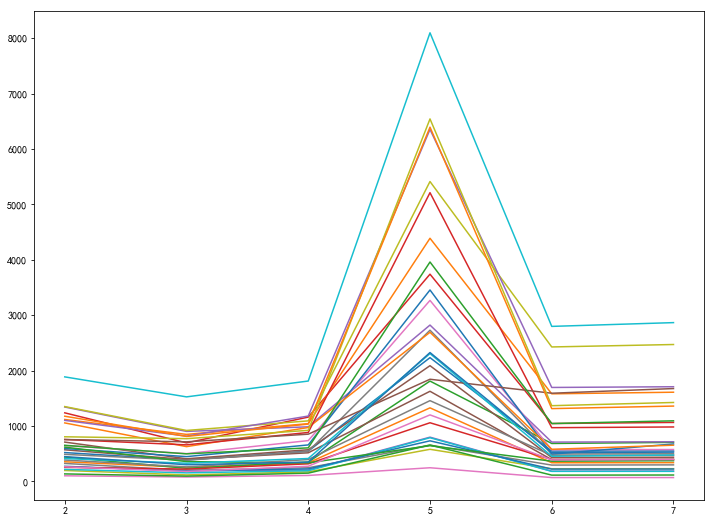

In [426]:
plt.figure(figsize=(12,9))
for i in range(0,c2.shape[0]):
    plt.plot(x,c2.iloc[i].values)


In [431]:
c3 = data_6[(data_6['target'] == 3)].copy().iloc[2:,:-2]
c3

,sea,-3.7,"-4,2",cs,qs,ws
sample_20180716-1_039,50,4,23,0,18,18
sample_20180716-1_040,60,8,37,0,26,26
sample_20190529-2_090,124,16,54,0,118,122
sample_20190529-2_092,1290,158,566,1,271,281
sample_20190604-1_090,159,20,78,0,97,97
sample_20190604-1_092,1277,158,652,0,258,263


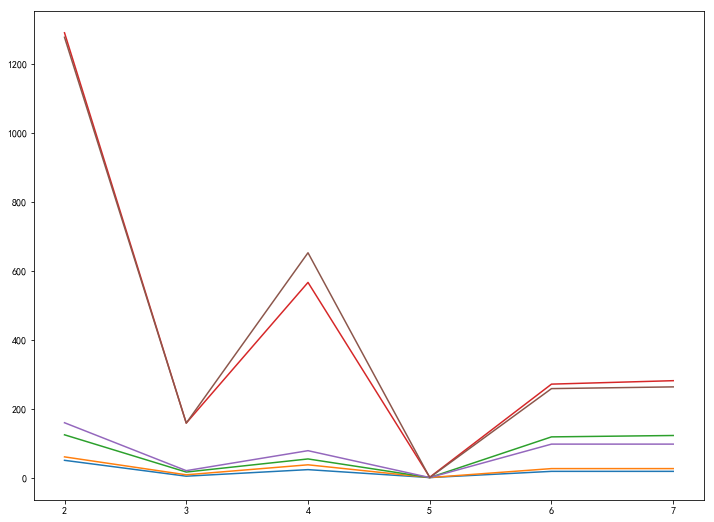

In [432]:
plt.figure(figsize=(12,9))
for i in range(0,c3.shape[0]):
    plt.plot(x,c3.iloc[i].values)


In [433]:
c4 = data_6[(data_6['target'] == 4)].copy().iloc[:,:-2]
c4

,sea,-3.7,"-4,2",cs,qs,ws
sample_20180510-1_060,336,296,396,1521,319,321
sample_20180604-1_009,505,256,342,1339,439,438
sample_20180604-1_010,400,168,269,1114,359,359
sample_20180604-1_011,539,306,365,2139,622,620
sample_20180604-1_078,130,88,110,356,49,51
sample_20180604-1_080,399,238,254,991,175,179
sample_20180704-2_024,617,409,547,2037,519,527
sample_20180704-2_031,847,498,655,2314,550,563
sample_20180704-2_035,403,250,337,1312,301,306
sample_20180704-2_036,175,121,167,746,173,180


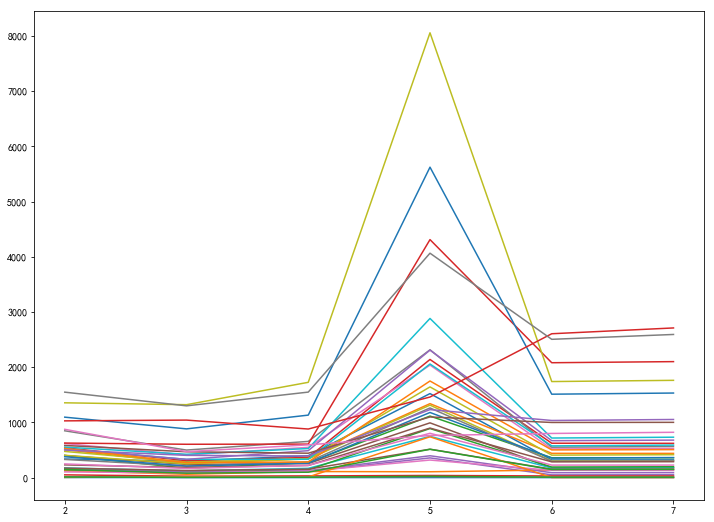

In [434]:
plt.figure(figsize=(12,9))
for i in range(0,c4.shape[0]):
    plt.plot(x,c4.iloc[i].values)


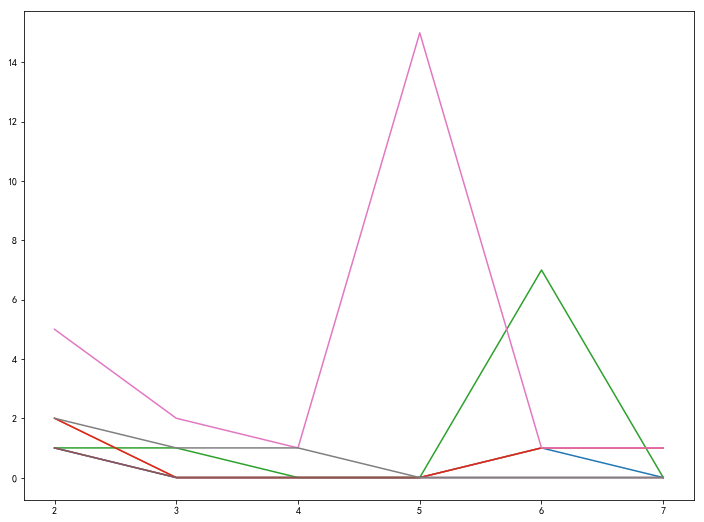

In [435]:
c5 = data_6[(data_6['target'] == 5)].copy().iloc[:,:-2]
plt.figure(figsize=(12,9))
for i in range(0,c5.shape[0]):
    plt.plot(x,c5.iloc[i].values)


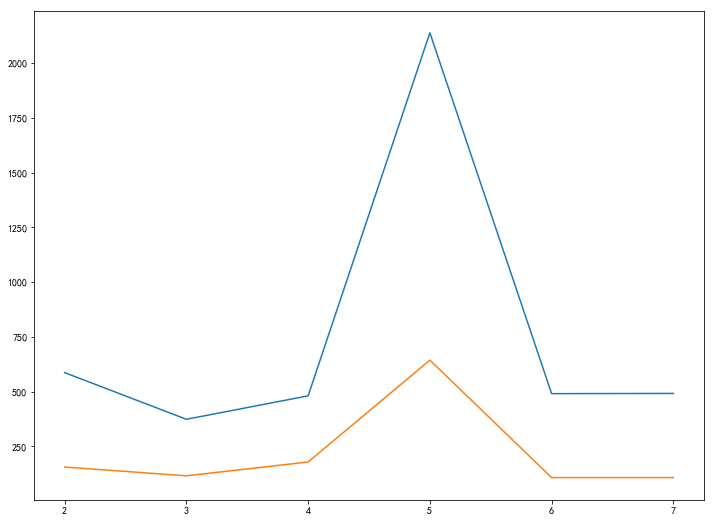

In [436]:
c6 = data_6[(data_6['target'] == 6)].copy().iloc[:,:-2]
plt.figure(figsize=(12,9))
for i in range(0,c6.shape[0]):
    plt.plot(x,c6.iloc[i].values)


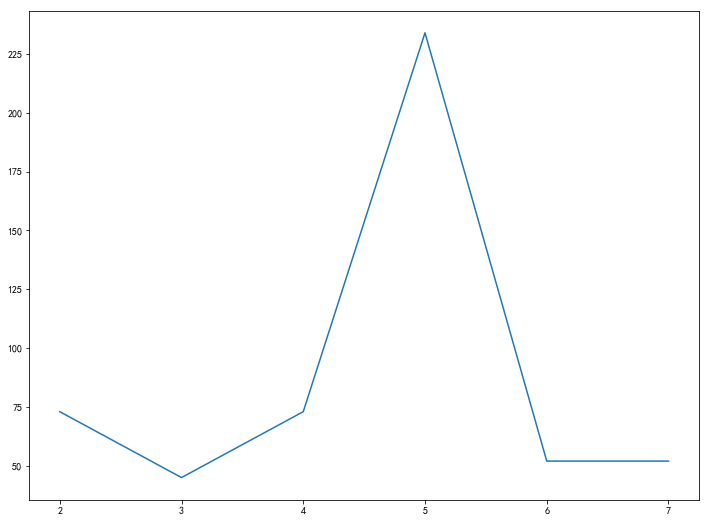

In [437]:
c7 = data_6[(data_6['target'] == 7)].copy().iloc[:,:-2]
plt.figure(figsize=(12,9))
for i in range(0,c7.shape[0]):
    plt.plot(x,c7.iloc[i].values)


In [361]:
#开始映射，获取映射了pgd结果和索引标签的数据
the_nodify_data_6 = not_modify_data.iloc[:,143523:-2]
the_nodify_target_6 = not_modify_data.iloc[:,-1].values

In [360]:
#开始映射，获取映射了pgd结果和索引标签的数据
the_nodify_data_6 = not_modify_data.iloc[:,-8:-2]
the_nodify_target_6 = not_modify_data.iloc[:,-1].values

In [362]:
X_train, X_test, y_train, y_test = train_test_split(the_nodify_data_6, the_nodify_target_6, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(61, 121908) (61,)
(27, 121908) (27,)


In [363]:
my_knn = KNeighborsClassifier(n_neighbors=5,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)

train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNeighborsClassifier结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('LogisticRegression结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯GaussianNB结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯MultinomialNB结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯BernoulliNB结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('DecisionTreeClassifier结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('RandomForestClassifier结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('svm结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[4 2 4 2 4 2 2 4 5 2 4 4 4 2 4 2 2 2 4 4 2 2 2 4 2 4 4] 
实际值：[2 4 4 2 4 2 2 4 4 4 4 2 2 5 4 2 2 3 4 4 4 2 3 2 4 4 4] 
训练分数:0.7049180327868853 
预测分数:0.5555555555555556
-------------- 
逻辑思蒂结果如下：
预测值：[2 4 4 4 2 2 2 4 5 4 2 4 2 4 4 2 4 7 4 4 4 4 7 2 4 4 4] 
实际值：[2 4 4 2 4 2 2 4 4 4 4 2 2 5 4 2 2 3 4 4 4 2 3 2 4 4 4] 
训练分数:1.0 
预测分数:0.6296296296296297
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[4 4 2 4 4 2 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 2 2 4 4 4] 
实际值：[2 4 4 2 4 2 2 4 4 4 4 2 2 5 4 2 2 3 4 4 4 2 3 2 4 4 4] 
训练分数:0.8524590163934426 
预测分数:0.6296296296296297
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[4 4 4 4 2 2 4 2 5 7 4 4 2 5 4 4 4 6 3 4 7 6 6 2 7 4 4] 
实际值：[2 4 4 2 4 2 2 4 4 4 4 2 2 5 4 2 2 3 4 4 4 2 3 2 4 4 4] 
训练分数:0.5737704918032787 
预测分数:0.4074074074074074
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2] 
实际值：[2 4 4 2 4 2 2 4 4 4 4 2 2 5 4 2 2 3 4 4 4 2 3 2 4 4 4] 
训练分数:0.5409836065573771 
预测分数:0.4074074074074074
-------------- 
决策树结果如下：
预测值：[

In [ ]:
modify_data1

In [ ]:
pca = PCA(n_components=300,whiten=True)

pca.fit(modify_data1)

data_pca = pca.transform(data)
# 从11750特征（像素）提取了300个关键的特征（高纬度-------->低维度）
data_pca.shape

In [259]:
data_2 = modify_data1.copy()

In [260]:
data_2.loc['temp'] = np.arange(0,265425)

In [499]:
data_3 = modify_data1.copy()

In [500]:
data_3['sea'] = data_3.iloc[:,143523:164424].mean(axis=1).values
data_3['-3.7'] = data_3.iloc[:,152020:155827].mean(axis=1).values
data_3['-4,2'] = data_3.iloc[:,147989:153842].mean(axis=1).values
data_3['cs'] = data_3.iloc[:,152320].values
data_3['qs'] = data_3.iloc[:,152270].values
data_3['ws'] = data_3.iloc[:,152262].values
data_3['the_index'] = data_3.index.values
data_3['target'] = data_3['the_index'].map(myindex)

In [313]:
def my_round(arg):
    if isinstance(arg,float) or isinstance(arg,int):
        return round(arg)
    return arg

In [501]:
data_3['sea'] = data_3['sea'].map(my_round)
data_3['-3.7'] = data_3['-3.7'].map(my_round)
data_3['-4,2'] = data_3['-4,2'].map(my_round)
data_3['cs'] = data_3['cs'].map(my_round)
data_3['qs'] = data_3['qs'].map(my_round)
data_3['ws'] = data_3['ws'].map(my_round)
data_3

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336700,336701,sea,-3.7,"-4,2",cs,qs,ws,the_index,target
sample_20180510-1_055,85.780881,85.780881,85.780881,85.780881,86.790068,86.790068,47.431782,86.790068,86.790068,84.771695,...,221.011918,223.030292,521,387,547,2234,548,550,sample_20180510-1_055,2
sample_20180510-1_057,38.344340,38.344340,38.344340,38.344340,38.344340,38.344340,20.181231,38.344340,38.344340,38.344340,...,108.978649,108.978649,355,254,335,1328,337,339,sample_20180510-1_057,2
sample_20180510-1_060,94.851787,95.860849,95.860849,95.860849,101.915218,101.915218,43.389647,101.915218,102.924280,100.906157,...,304.736594,303.727532,336,296,396,1521,319,321,sample_20180510-1_060,4
sample_20180604-1_005,36.484728,36.484728,36.484728,36.484728,36.484728,36.484728,24.323152,36.484728,36.484728,36.484728,...,164.181274,163.167810,440,237,351,1811,685,705,sample_20180604-1_005,2
sample_20180604-1_006,91.143640,91.143640,91.143640,91.143640,91.143640,91.143640,69.876791,92.156347,92.156347,89.118226,...,56.711598,56.711598,1238,696,1161,3740,1045,1065,sample_20180604-1_006,2
sample_20180604-1_009,28.313472,28.313472,28.313472,28.313472,28.313472,28.313472,21.235104,28.313472,28.313472,28.313472,...,86.962806,86.962806,505,256,342,1339,439,438,sample_20180604-1_009,4
sample_20180604-1_010,58.671229,58.671229,58.671229,58.671229,60.694375,60.694375,43.497636,61.705948,61.705948,61.705948,...,131.504480,131.504480,400,168,269,1114,359,359,sample_20180604-1_010,4
sample_20180604-1_011,21.258904,21.258904,21.258904,21.258904,21.258904,21.258904,17.209589,21.258904,21.258904,22.271233,...,184.243836,184.243836,539,306,365,2139,622,620,sample_20180604-1_011,4
sample_20180604-1_078,147.744803,148.756753,148.756753,149.768704,149.768704,149.768704,111.314577,149.768704,149.768704,147.744803,...,87.027760,86.015810,130,88,110,356,49,51,sample_20180604-1_078,4
sample_20180604-1_079,81.016569,82.029276,82.029276,82.029276,82.029276,82.029276,59.749720,82.029276,82.029276,82.029276,...,38.482870,38.482870,261,204,203,799,185,188,sample_20180604-1_079,2


In [503]:
data_6 = data_3.iloc[:,-8:]
data_6.to_excel('data_6.xls',)

In [505]:
#开始映射，获取映射了pgd结果和索引标签的数据
the_data_6 = data_3.iloc[:,-8:-2]
the_target_6 = data_3.iloc[:,-1].values

In [507]:
# data_6
the_data_6

,sea,-3.7,"-4,2",cs,qs,ws
sample_20180510-1_055,521,387,547,2234,548,550
sample_20180510-1_057,355,254,335,1328,337,339
sample_20180510-1_060,336,296,396,1521,319,321
sample_20180604-1_005,440,237,351,1811,685,705
sample_20180604-1_006,1238,696,1161,3740,1045,1065
sample_20180604-1_009,505,256,342,1339,439,438
sample_20180604-1_010,400,168,269,1114,359,359
sample_20180604-1_011,539,306,365,2139,622,620
sample_20180604-1_078,130,88,110,356,49,51
sample_20180604-1_079,261,204,203,799,185,188


In [517]:
#使用K-Means进行数据处理
from sklearn.cluster import KMeans


kMeans = KMeans(n_clusters=6,)

X_train = the_data_6[['sea','-3.7','-4,2']]

km = kMeans.fit(X_train)
y_ = km.predict(X_train)

In [518]:
y_

array([0, 5, 5, 5, 2, 5, 5, 5, 1, 5, 5, 1, 1, 0, 0, 0, 5, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 5, 2, 5, 1, 5, 5, 1, 1, 1,
       1, 0, 0, 5, 5, 5, 1, 1, 1, 2, 0, 0, 1, 1, 4, 0, 0, 2, 5, 2, 4, 0,
       2, 5, 0, 2, 1, 2, 0, 5, 5, 0, 5, 1, 3, 1, 3, 0, 4, 2, 5, 5, 2, 0])

In [512]:
data_6['target'].values - 2

array([0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 2, 0, 2, 4, 5, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 0, 4, 2, 3, 0, 0, 0, 3, 3, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0],
      dtype=int64)

In [519]:
X_train, X_test, y_train, y_test = train_test_split(the_data_6.iloc[:,:3], the_target_6, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 3) (61,)
(27, 3) (27,)


In [ ]:
my_knn = KNeighborsClassifier(n_neighbors=5,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[5 4 4 2 2 2 2 5 2 3 5 5 2 2 2 2 2 2 2 2 2 2 5 2 2 5 4] 
实际值：[4 4 4 4 2 2 4 5 4 7 5 5 4 2 4 2 4 4 4 6 2 2 5 2 2 4 4] 
训练分数:0.5901639344262295 
预测分数:0.5555555555555556
-------------- 
逻辑思蒂结果如下：
预测值：[5 4 4 2 4 2 4 5 2 4 5 5 2 2 4 2 2 2 4 4 2 2 5 2 4 4 4] 
实际值：[4 4 4 4 2 2 4 5 4 7 5 5 4 2 4 2 4 4 4 6 2 2 5 2 2 4 4] 
训练分数:0.8032786885245902 
预测分数:0.6296296296296297
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[5 3 4 4 4 2 2 5 2 3 5 3 2 2 4 2 4 2 2 4 4 2 5 2 4 3 4] 
实际值：[4 4 4 4 2 2 4 5 4 7 5 5 4 2 4 2 4 4 4 6 2 2 5 2 2 4 4] 
训练分数:0.6065573770491803 
预测分数:0.48148148148148145
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[4 4 4 2 4 4 4 4 2 2 4 4 4 4 2 4 4 2 2 2 2 2 4 2 4 2 2] 
实际值：[4 4 4 4 2 2 4 5 4 7 5 5 4 2 4 2 4 4 4 6 2 2 5 2 2 4 4] 
训练分数:0.6885245901639344 
预测分数:0.3333333333333333
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[5 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2] 
实际值：[4 4 4 4 2 2 4 5 4 7 5 5 4 2 4 2 4 4 4 6 2 2 5 2 2 4 4] 
训练分数:0.45901639344262296 
预测分数:0.37037037037037035
------------

In [305]:
from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "rfc_model_for_6.pkl"  
joblib.dump(rfc, joblib_file)



['rfc_model_for_6.pkl']

In [406]:
joblib_file = "logistic_model_3.pkl"  
joblib.dump(logistic, joblib_file)


['logistic_model_3.pkl']

In [419]:
mylogistic = joblib.load(joblib_file)
mylogistic.predict(X_test)

array([2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 5, 2, 2, 2, 2, 2, 2,
       4, 5, 4, 4, 4], dtype=int64)

In [420]:
y_test

array([2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 5, 6, 4, 2, 2, 2, 4,
       4, 4, 4, 4, 4], dtype=int64)

In [421]:
mylogistic.score(X_test,y_test)

0.6666666666666666

In [471]:
# 以相同最大深度比例的修正数据，做测试
merge_res_test11 = modify_data1.copy()

#开始映射，获取映射了pgd结果和索引标签的数据
merge_res_test11['the_index'] = merge_res_test11.index.values
merge_res_test11['target'] = merge_res_test11['the_index'].map(myindex)
merge_res_test11
the_data11 = merge_res_test11.iloc[:,:-2].values.astype(float)
the_target11 = merge_res_test11.iloc[:,-1].values.astype(int)


In [472]:
X_train, X_test, y_train, y_test = train_test_split(the_data11, the_target11, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 265425) (61,)
(27, 265425) (27,)


In [473]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[2 4 2 4 4 4 2 4 4 4 2 2 2 2 2 3 2 4 4 2 4 2 4 2 2 4 3] 
实际值：[4 2 4 4 2 2 2 4 5 4 2 4 4 4 2 3 4 4 2 4 4 7 4 2 4 4 6] 
训练分数:0.7377049180327869 
预测分数:0.4444444444444444
-------------- 
逻辑思蒂结果如下：
预测值：[4 2 4 2 2 4 2 2 5 4 2 2 5 4 2 3 2 4 4 4 2 2 2 2 2 4 2] 
实际值：[4 2 4 4 2 2 2 4 5 4 2 4 4 4 2 3 4 4 2 4 4 7 4 2 4 4 6] 
训练分数:1.0 
预测分数:0.5555555555555556
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[4 4 4 2 2 2 2 2 5 2 2 4 4 4 2 4 2 2 2 3 2 2 2 4 2 4 4] 
实际值：[4 2 4 4 2 2 2 4 5 4 2 4 4 4 2 3 4 4 2 4 4 7 4 2 4 4 6] 
训练分数:0.9344262295081968 
预测分数:0.48148148148148145
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[4 4 4 4 2 4 2 2 5 4 2 5 4 4 2 4 2 4 4 4 5 6 2 6 4 2 3] 
实际值：[4 2 4 4 2 2 2 4 5 4 2 4 4 4 2 3 4 4 2 4 4 7 4 2 4 4 6] 
训练分数:0.7377049180327869 
预测分数:0.5185185185185185
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2] 
实际值：[4 2 4 4 2 2 2 4 5 4 2 4 4 4 2 3 4 4 2 4 4 7 4 2 4 4 6] 
训练分数:0.5081967213114754 
预测分数:0.3333333333333333
-------------- 
决策树结果如下：
预测值：

In [228]:

from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "rfc_model.pkl"  
joblib.dump(rfc, joblib_file)

# Load from file


# Calculate the accuracy and predictions
# score = joblib_model.score(Xtest, Ytest)  
# print("Test score: {0:.2f} %".format(100 * score))  
# Ypredict = pickle_model.predict(Xtest)

['rfc_model.pkl']

In [236]:
joblib_file1 = "bys_gs_model.pkl"  
joblib.dump(g_NB, joblib_file1)


['bys_gs_model.pkl']

In [247]:
rfc_model = joblib.load(joblib_file)


pre_y = rfc_model.predict(X_test)
pre_score = rfc_model.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n预测分数:%s\n-------------- '%(pre_y,y_test,pre_score))



随机森林分类结果如下：
预测值：[5 5 5 4 2 3 2 4 3 2 2 4 3 4 4 4 2 2 4 2 2 2 2 4 4 3 5 4 2 4 4 2 2 4 4 2] 
实际值：[5 5 5 4 2 3 2 4 3 2 2 4 3 4 4 4 2 2 4 2 2 2 2 4 4 3 5 4 2 4 4 2 2 4 4 2] 
预测分数:1.0
-------------- 


In [248]:
bys_gs_model = joblib.load(joblib_file1)
pre_y = bys_gs_model.predict(X_test)
pre_score = bys_gs_model.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n预测分数:%s\n-------------- '%(pre_y,y_test,pre_score))



贝叶斯高斯分布模型结果如下：
预测值：[5 5 5 4 2 3 2 4 3 4 2 4 3 4 4 4 2 2 4 2 4 2 2 4 4 3 5 4 2 4 4 2 2 4 4 4] 
实际值：[5 5 5 4 2 3 2 4 3 2 2 4 3 4 4 4 2 2 4 2 2 2 2 4 4 3 5 4 2 4 4 2 2 4 4 2] 
预测分数:0.9166666666666666
-------------- 


In [474]:
# 以相同最大深度比例的修正数据，取sea区域做测试
merge_res_test12 = modify_data1.T.copy()
test_data12 = merge_res_test12.iloc[143523:164424].copy()
#开始映射，获取映射了pgd结果和索引标签的数据

test_data12.loc['the_index'] = test_data12.columns.values
test_data12.loc['target'] = test_data12.loc['the_index'].map(myindex)

the_data12 = test_data12.T.iloc[:,:-2].values.astype(float)
the_target12 = test_data12.T.iloc[:,-1].values.astype(int)


In [475]:
X_train, X_test, y_train, y_test = train_test_split(the_data12, the_target12, test_size=0.4)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(52, 20901) (52,)
(36, 20901) (36,)


In [476]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[4 4 2 4 4 2 2 4 3 2 2 2 2 4 3 2 2 4 2 5 2 2 2 4 4 4 2 2 2 2 2 2 2 2 4 4] 
实际值：[5 4 4 2 4 4 2 4 2 4 4 2 4 2 4 2 2 2 2 5 3 2 2 4 5 2 2 4 4 2 3 4 2 4 4 4] 
训练分数:0.7307692307692307 
预测分数:0.4722222222222222
-------------- 
逻辑思蒂结果如下：
预测值：[4 4 2 2 3 2 7 2 6 2 2 2 4 6 4 4 4 2 2 5 3 2 4 4 5 4 4 3 4 4 3 4 2 6 4 2] 
实际值：[5 4 4 2 4 4 2 4 2 4 4 2 4 2 4 2 2 2 2 5 3 2 2 4 5 2 2 4 4 2 3 4 2 4 4 4] 
训练分数:1.0 
预测分数:0.4722222222222222
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[5 4 4 2 4 2 6 2 4 6 2 2 4 4 2 2 2 2 2 4 4 2 2 2 5 4 4 4 2 2 3 2 2 2 4 2] 
实际值：[5 4 4 2 4 4 2 4 2 4 4 2 4 2 4 2 2 2 2 5 3 2 2 4 5 2 2 4 4 2 3 4 2 4 4 4] 
训练分数:0.8269230769230769 
预测分数:0.5277777777777778
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[5 2 6 2 4 2 6 6 6 6 4 4 4 4 6 2 2 4 2 5 3 2 4 6 5 4 4 6 2 4 3 6 4 4 4 6] 
实际值：[5 4 4 2 4 4 2 4 2 4 4 2 4 2 4 2 2 2 2 5 3 2 2 4 5 2 2 4 4 2 3 4 2 4 4 4] 
训练分数:0.6153846153846154 
预测分数:0.4166666666666667
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[5 5 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 5 2 2 2 2 5 2 

In [153]:
# 单独取sea大区域的特征数据
merge_res_test0 = merge_res_test.copy()
test_data0 = merge_res_test0.iloc[143523:164424].copy()
#开始映射，获取映射了pgd结果和索引标签的数据

test_data0.loc['the_index'] = test_data0.columns.values
test_data0.loc['target'] = test_data0.loc['the_index'].map(myindex)

the_data0 = test_data0.T.iloc[:,:-2].values.astype(float)
the_target0 = test_data0.T.iloc[:,-1].values.astype(int)


In [154]:
X_train, X_test, y_train, y_test = train_test_split(the_data0, the_target0, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(63, 20901) (63,)
(27, 20901) (27,)


In [155]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[2 5 4 4 4 4 4 2 5 4 2 4 2 2 2 3 2 2 3 2 3 2 2 2 2 2 3] 
实际值：[3 5 2 4 2 4 4 4 5 2 4 4 4 4 6 4 4 6 3 4 2 2 2 4 4 2 4] 
训练分数:0.7777777777777778 
预测分数:0.37037037037037035
-------------- 
逻辑思蒂结果如下：
预测值：[3 5 2 4 4 4 4 2 5 7 3 4 2 2 2 5 2 7 3 4 4 2 4 2 2 4 4] 
实际值：[3 5 2 4 2 4 4 4 5 2 4 4 4 4 6 4 4 6 3 4 2 2 2 4 4 2 4] 
训练分数:1.0 
预测分数:0.4444444444444444
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[2 4 4 4 4 4 2 4 5 2 4 4 2 4 2 5 4 4 4 4 4 2 2 4 4 4 5] 
实际值：[3 5 2 4 2 4 4 4 5 2 4 4 4 4 6 4 4 6 3 4 2 2 2 4 4 2 4] 
训练分数:0.7619047619047619 
预测分数:0.5185185185185185
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[3 5 4 4 4 4 4 2 5 7 4 4 2 4 4 5 4 2 3 2 4 2 4 2 2 2 2] 
实际值：[3 5 2 4 2 4 4 4 5 2 4 4 4 4 6 4 4 6 3 4 2 2 2 4 4 2 4] 
训练分数:0.7142857142857143 
预测分数:0.48148148148148145
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[2 5 2 2 4 2 2 2 5 4 2 2 2 2 2 5 2 4 4 2 4 2 2 2 2 2 5] 
实际值：[3 5 2 4 2 4 4 4 5 2 4 4 4 4 6 4 4 6 3 4 2 2 2 4 4 2 4] 
训练分数:0.6507936507936508 
预测分数:0.2222222222222222
-------------- 
决策树结果如下：
预测值

In [478]:
modify_data1

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20180510-1_055,85.780881,85.780881,85.780881,85.780881,86.790068,86.790068,47.431782,86.790068,86.790068,84.771695,...,222.021105,222.021105,220.002731,222.021105,222.021105,222.021105,222.021105,222.021105,221.011918,223.030292
sample_20180510-1_057,38.344340,38.344340,38.344340,38.344340,38.344340,38.344340,20.181231,38.344340,38.344340,38.344340,...,108.978649,108.978649,108.978649,108.978649,106.960526,108.978649,108.978649,108.978649,108.978649,108.978649
sample_20180510-1_060,94.851787,95.860849,95.860849,95.860849,101.915218,101.915218,43.389647,101.915218,102.924280,100.906157,...,304.736594,304.736594,303.727532,304.736594,299.691286,304.736594,304.736594,304.736594,304.736594,303.727532
sample_20180604-1_005,36.484728,36.484728,36.484728,36.484728,36.484728,36.484728,24.323152,36.484728,36.484728,36.484728,...,166.208203,166.208203,166.208203,165.194739,165.194739,165.194739,164.181274,164.181274,164.181274,163.167810
sample_20180604-1_006,91.143640,91.143640,91.143640,91.143640,91.143640,91.143640,69.876791,92.156347,92.156347,89.118226,...,55.698891,55.698891,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598,56.711598
sample_20180604-1_009,28.313472,28.313472,28.313472,28.313472,28.313472,28.313472,21.235104,28.313472,28.313472,28.313472,...,87.974002,87.974002,84.940415,87.974002,87.974002,87.974002,87.974002,86.962806,86.962806,86.962806
sample_20180604-1_010,58.671229,58.671229,58.671229,58.671229,60.694375,60.694375,43.497636,61.705948,61.705948,61.705948,...,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480,131.504480
sample_20180604-1_011,21.258904,21.258904,21.258904,21.258904,21.258904,21.258904,17.209589,21.258904,21.258904,22.271233,...,184.243836,184.243836,183.231507,184.243836,183.231507,184.243836,184.243836,184.243836,184.243836,184.243836
sample_20180604-1_078,147.744803,148.756753,148.756753,149.768704,149.768704,149.768704,111.314577,149.768704,149.768704,147.744803,...,88.039711,88.039711,88.039711,88.039711,87.027760,87.027760,87.027760,87.027760,87.027760,86.015810
sample_20180604-1_079,81.016569,82.029276,82.029276,82.029276,82.029276,82.029276,59.749720,82.029276,82.029276,82.029276,...,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870,38.482870


In [481]:
#设置间隔为20k，求平均值
# for i in range(71277,336702,20000):
merge_res_test1 = modify_data1.T.copy()
for i in range(0,265426,20000):
#     merge_res_test1.loc['mean_%d_%d'%(i,i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)
    merge_res_test1.loc['mean_%d_%d'%(71277+i,71277+i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)

#开始映射，获取映射了pgd结果和索引标签的数据
test_data = merge_res_test1.iloc[265425:].copy()
test_data.loc['the_index'] = test_data.columns.values
test_data.loc['target'] = test_data.loc['the_index'].map(myindex)
test_data
 
the_data = test_data.T.iloc[:,:-2].values.astype(float)
the_target = test_data.T.iloc[:,-1].values.astype(int)


In [482]:
X_train, X_test, y_train, y_test = train_test_split(the_data, the_target, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 14) (61,)
(27, 14) (27,)


In [483]:
my_knn = KNeighborsClassifier(n_neighbors=3,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))
# 20k结果

KNN结果如下：
预测值：[4 2 2 4 4 4 4 4 2 2 2 4 2 4 4 2 2 4 4 4 2 2 2 4 2 5 4] 
实际值：[4 4 2 2 4 2 4 4 3 2 6 2 4 4 2 4 3 2 2 2 4 2 4 4 4 5 3] 
训练分数:0.7049180327868853 
预测分数:0.37037037037037035
-------------- 
逻辑思蒂结果如下：
预测值：[2 2 5 2 4 4 2 4 4 4 6 4 2 4 2 7 2 4 4 2 5 2 2 2 5 5 7] 
实际值：[4 4 2 2 4 2 4 4 3 2 6 2 4 4 2 4 3 2 2 2 4 2 4 4 4 5 3] 
训练分数:0.8032786885245902 
预测分数:0.3333333333333333
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[2 4 2 4 2 4 2 4 4 2 4 2 2 3 2 4 4 4 2 2 4 2 5 2 4 4 4] 
实际值：[4 4 2 2 4 2 4 4 3 2 6 2 4 4 2 4 3 2 2 2 4 2 4 4 4 5 3] 
训练分数:0.5901639344262295 
预测分数:0.4444444444444444
-------------- 
决策树结果如下：
预测值：[2 4 4 4 4 4 5 4 4 4 4 4 3 4 2 2 2 4 4 4 4 2 5 4 5 5 4] 
实际值：[4 4 2 2 4 2 4 4 3 2 6 2 4 4 2 4 3 2 2 2 4 2 4 4 4 5 3] 
训练分数:0.6721311475409836 
预测分数:0.3333333333333333
-------------- 
随机森林分类结果如下：
预测值：[2 4 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 4 4 2 5 4 5 5 4] 
实际值：[4 4 2 2 4 2 4 4 3 2 6 2 4 4 2 4 3 2 2 2 4 2 4 4 4 5 3] 
训练分数:1.0 
预测分数:0.5185185185185185
-------------- 
支持向量机结果如下：
预测值：[4 4 4 4 

In [484]:
#设置间隔为2k，求平均值
# for i in range(71277,336702,20000):
merge_res_test1 = modify_data1.T.copy()
for i in range(0,265426,2000):
#     merge_res_test1.loc['mean_%d_%d'%(i,i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)
    merge_res_test_2k.loc['mean_%d_%d'%(71277+i,71277+i+2000)] = merge_res_test_2k.iloc[i:i+2001].mean(axis=0)
merge_res_test_2k

#开始映射，获取映射了pgd结果和索引标签的数据
test_data_2k = merge_res_test_2k.iloc[265425:].copy()
test_data_2k.loc['the_index'] = test_data_2k.columns.values
test_data_2k.loc['target'] = test_data_2k.loc['the_index'].map(myindex)
 
the_data_2k = test_data_2k.T.iloc[:,:-2].values.astype(float)


the_target_2k = test_data_2k.T.iloc[:,-1].values.astype(int)


In [485]:
X_train, X_test, y_train, y_test = train_test_split(the_data_2k, the_target_2k, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(63, 133) (63,)
(27, 133) (27,)


In [94]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression 
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm

In [486]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))
# 2k结果

KNN结果如下：
预测值：[4 4 4 4 4 4 3 4 3 3 4 2 2 3 4 4 4 5 4 4 4 4 2 2 4 4 4] 
实际值：[2 4 4 6 2 2 2 4 3 4 4 2 2 2 2 2 2 5 2 2 4 4 4 4 4 2 2] 
训练分数:0.8253968253968254 
预测分数:0.4074074074074074
-------------- 
逻辑思蒂结果如下：
预测值：[4 2 2 2 4 2 3 4 3 7 4 4 2 4 2 2 4 5 4 4 4 4 3 4 5 4 4] 
实际值：[2 4 4 6 2 2 2 4 3 4 4 2 2 2 2 2 2 5 2 2 4 4 4 4 4 2 2] 
训练分数:1.0 
预测分数:0.4074074074074074
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[4 2 4 4 4 4 3 3 4 3 4 2 4 3 4 2 2 5 4 4 4 3 2 3 4 4 4] 
实际值：[2 4 4 6 2 2 2 4 3 4 4 2 2 2 2 2 2 5 2 2 4 4 4 4 4 2 2] 
训练分数:0.6984126984126984 
预测分数:0.2962962962962963
-------------- 
决策树结果如下：
预测值：[4 4 4 4 4 4 2 3 7 3 4 4 4 2 4 2 4 5 4 4 4 2 2 4 7 4 4] 
实际值：[2 4 4 6 2 2 2 4 3 4 4 2 2 2 2 2 2 5 2 2 4 4 4 4 4 2 2] 
训练分数:0.873015873015873 
预测分数:0.3333333333333333
-------------- 
随机森林分类结果如下：
预测值：[4 2 4 4 4 4 2 4 4 3 4 4 4 2 4 4 4 5 4 4 4 4 4 2 5 4 4] 
实际值：[2 4 4 6 2 2 2 4 3 4 4 2 2 2 2 2 2 5 2 2 4 4 4 4 4 2 2] 
训练分数:1.0 
预测分数:0.3333333333333333
-------------- 
支持向量机结果如下：
预测值：[4 4 4 4 4 4 4 4 4 4 4 4 4

In [487]:
%%time
#设置间隔为200，求平均值
# for i in range(71277,336702,20000):
merge_res_test_200 = modify_data1.T.copy()
for i in range(0,265426,200):
#     merge_res_test1.loc['mean_%d_%d'%(i,i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)
    merge_res_test_200.loc['mean_%d_%d'%(71277+i,71277+i+200)] = merge_res_test_200.iloc[i:i+201].mean(axis=0)


#开始映射，获取映射了pgd结果和索引标签的数据
test_data_200 = merge_res_test_200.iloc[265425:].copy()
test_data_200.loc['the_index'] = test_data_200.columns.values
test_data_200.loc['target'] = test_data_200.loc['the_index'].map(myindex)
 
the_data_200 = test_data_200.T.iloc[:,:-2].values.astype(float)


the_target_200 = test_data_200.T.iloc[:,-1].values.astype(int)


In [488]:
X_train, X_test, y_train, y_test = train_test_split(the_data_200, the_target_200, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 1328) (61,)
(27, 1328) (27,)


In [489]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))
# 200结果

KNN结果如下：
预测值：[4 2 2 4 2 2 4 4 4 4 4 2 2 4 4 4 4 4 2 4 2 2 2 3 2 2 2] 
实际值：[4 3 2 4 4 4 2 4 2 2 2 2 2 4 4 4 2 4 2 4 2 6 3 7 2 4 2] 
训练分数:0.819672131147541 
预测分数:0.5555555555555556
-------------- 
逻辑思蒂结果如下：
预测值：[4 4 2 2 3 4 4 4 4 2 4 4 4 2 4 2 4 4 4 4 2 3 3 2 2 2 3] 
实际值：[4 3 2 4 4 4 2 4 2 2 2 2 2 4 4 4 2 4 2 4 2 6 3 7 2 4 2] 
训练分数:1.0 
预测分数:0.4074074074074074
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[4 3 2 2 2 4 2 4 2 4 4 2 4 4 2 4 2 4 2 4 2 4 3 4 2 2 4] 
实际值：[4 3 2 4 4 4 2 4 2 2 2 2 2 4 4 4 2 4 2 4 2 6 3 7 2 4 2] 
训练分数:0.819672131147541 
预测分数:0.6296296296296297
-------------- 
决策树结果如下：
预测值：[4 2 2 2 4 4 4 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 4 2 4 2 2] 
实际值：[4 3 2 4 4 4 2 4 2 2 2 2 2 4 4 4 2 4 2 4 2 6 3 7 2 4 2] 
训练分数:0.8524590163934426 
预测分数:0.5555555555555556
-------------- 
随机森林分类结果如下：
预测值：[4 4 2 2 2 2 4 4 4 4 4 2 2 2 4 4 2 2 2 4 2 2 3 2 2 2 2] 
实际值：[4 3 2 4 4 4 2 4 2 2 2 2 2 4 4 4 2 4 2 4 2 6 3 7 2 4 2] 
训练分数:0.9836065573770492 
预测分数:0.5185185185185185
-------------- 
支持向量机结果如下：
预测值：[4 4 4 4 4 4

In [119]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [ ]:
merge_res_test1 = modify_data1.iloc[:,2:].T.copy()

In [444]:
merge_res_test.copy()

,sample_20180510-1_055,sample_20180510-1_057,sample_20180510-1_060,sample_20180604-1_005,sample_20180604-1_006,sample_20180604-1_009,sample_20180604-1_010,sample_20180604-1_011,sample_20180604-1_078,sample_20180604-1_079,...,sample_20190529-2_092,sample_20190604-1_090,sample_20190604-1_092,sample_20190704-1_004,sample_20190704-1_005,sample_20190704-1_006,sample_20190704-1_007,sample_20190704-1_010,sample_20190704-1_011,sample_20190704-1_019
71277,85.0,38.0,94.0,36.0,90.0,28.0,58.0,21.0,146.0,80.0,...,382.0,81.0,191.0,168.0,90.0,66.0,145.0,248.0,244.0,114.0
71278,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71279,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,147.0,81.0,...,384.0,81.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71280,85.0,38.0,95.0,36.0,90.0,28.0,58.0,21.0,148.0,81.0,...,384.0,82.0,192.0,168.0,90.0,66.0,146.0,250.0,245.0,114.0
71281,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71282,86.0,38.0,101.0,36.0,90.0,28.0,60.0,21.0,148.0,81.0,...,384.0,83.0,192.0,169.0,90.0,67.0,147.0,251.0,246.0,114.0
71283,47.0,20.0,43.0,24.0,69.0,21.0,43.0,17.0,110.0,59.0,...,295.0,71.0,156.0,139.0,82.0,59.0,118.0,191.0,195.0,80.0
71284,86.0,38.0,101.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71285,86.0,38.0,102.0,36.0,91.0,28.0,61.0,21.0,148.0,81.0,...,385.0,83.0,193.0,171.0,91.0,70.0,149.0,254.0,249.0,114.0
71286,84.0,38.0,100.0,36.0,88.0,28.0,61.0,22.0,146.0,81.0,...,384.0,84.0,192.0,171.0,91.0,70.0,149.0,252.0,247.0,113.0


In [490]:
%%time
#设置间隔为20，求平均值
# for i in range(71277,336702,20000):
merge_res_test_20 = modify_data1.T.copy()
for i in range(0,265426,20):
#     merge_res_test1.loc['mean_%d_%d'%(i,i+20000)] = merge_res_test1.iloc[i:i+20001].mean(axis=0)
    merge_res_test_20.loc['mean_%d_%d'%(71277+i,71277+i+20)] = merge_res_test_20.iloc[i:i+21].mean(axis=0)


#开始映射，获取映射了pgd结果和索引标签的数据
test_data_20 = merge_res_test_20.iloc[265425:].copy()
test_data_20.loc['the_index'] = test_data_20.columns.values
test_data_20.loc['target'] = test_data_20.loc['the_index'].map(myindex)
 
the_data_20 = test_data_20.T.iloc[:,:-2].values.astype(float)


the_target_20 = test_data_20.T.iloc[:,-1].values.astype(int)


Wall time: 1h 18min 6s


In [491]:
X_train, X_test, y_train, y_test = train_test_split(the_data_20, the_target_20, test_size=0.3)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(61, 13272) (61,)
(27, 13272) (27,)


In [492]:
my_knn = KNeighborsClassifier(n_neighbors=2,)
my_knn.fit(X_train,y_train)
pre_y = my_knn.predict(X_test)
train_score = my_knn.score(X_train,y_train)
pre_score = my_knn.score(X_test,y_test)
print('KNN结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)
pre_y = logistic.predict(X_test)
train_score = logistic.score(X_train,y_train)
pre_score = logistic.score(X_test,y_test)
print('逻辑思蒂结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


g_NB = GaussianNB()
g_NB.fit(X_train,y_train)
g_NB.predict(X_test)
pre_y = g_NB.predict(X_test)
train_score = g_NB.score(X_train,y_train)
pre_score = g_NB.score(X_test,y_test)
print('贝叶斯高斯分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


m_NB = MultinomialNB()
m_NB.fit(X_train,y_train)
pre_y = m_NB.predict(X_test)
train_score = m_NB.score(X_train,y_train)
pre_score = m_NB.score(X_test,y_test)
print('贝叶斯多项式分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)
pre_y = b_NB.predict(X_test)
train_score = b_NB.score(X_train,y_train)
pre_score = b_NB.score(X_test,y_test)
print('贝叶斯博努力分布模型结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt.predict(X_test)
pre_y = dt.predict(X_test)
train_score = dt.score(X_train,y_train)
pre_score = dt.score(X_test,y_test)
print('决策树结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.predict(X_test)
pre_y = rfc.predict(X_test)
train_score = rfc.score(X_train,y_train)
pre_score = rfc.score(X_test,y_test)
print('随机森林分类结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
pre_y = clf.predict(X_test)
train_score = clf.score(X_train,y_train)
pre_score = clf.score(X_test,y_test)
print('支持向量机结果如下：\n预测值：%s \n实际值：%s \n训练分数:%s \n预测分数:%s\n-------------- '%(pre_y,y_test,train_score,pre_score))


KNN结果如下：
预测值：[2 3 4 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 4 4 2 4 2 2] 
实际值：[2 4 2 6 2 2 4 2 3 4 6 5 2 5 5 2 4 2 4 4 5 5 2 4 2 4 4] 
训练分数:0.7868852459016393 
预测分数:0.25925925925925924
-------------- 
逻辑思蒂结果如下：
预测值：[2 4 4 2 2 4 2 4 2 4 4 4 4 4 5 2 2 2 2 7 5 5 2 2 2 2 2] 
实际值：[2 4 2 6 2 2 4 2 3 4 6 5 2 5 5 2 4 2 4 4 5 5 2 4 2 4 4] 
训练分数:1.0 
预测分数:0.4074074074074074
-------------- 
贝叶斯高斯分布模型结果如下：
预测值：[2 4 2 2 4 4 2 2 4 4 4 2 4 2 4 4 2 2 4 2 4 4 4 4 2 2 4] 
实际值：[2 4 2 6 2 2 4 2 3 4 6 5 2 5 5 2 4 2 4 4 5 5 2 4 2 4 4] 
训练分数:0.8852459016393442 
预测分数:0.37037037037037035
-------------- 
贝叶斯多项式分布模型结果如下：
预测值：[2 4 4 2 4 4 2 2 7 4 7 5 4 5 5 4 4 2 4 7 7 5 2 4 2 2 4] 
实际值：[2 4 2 6 2 2 4 2 3 4 6 5 2 5 5 2 4 2 4 4 5 5 2 4 2 4 4] 
训练分数:0.7213114754098361 
预测分数:0.5555555555555556
-------------- 
贝叶斯博努力分布模型结果如下：
预测值：[2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2] 
实际值：[2 4 2 6 2 2 4 2 3 4 6 5 2 5 5 2 4 2 4 4 5 5 2 4 2 4 4] 
训练分数:0.47540983606557374 
预测分数:0.4074074074074074
-------------- 
决策树结果如下：
预测

In [47]:
the_s = list(y_train)
p2 = the_s.count(2)/len(the_s)
p3 = the_s.count(3)/len(the_s)
p4 = the_s.count(4)/len(the_s)
p5 = the_s.count(5)/len(the_s)
p6 = the_s.count(6)/len(the_s)

display(p2,p3,p4,p5,p6)

0.34375

0.09375

0.453125

0.09375

0.015625

In [61]:
x= ['a','c','a','c','a','b','d','b']
z = list(set(x))
z

['b', 'd', 'c', 'a']

In [58]:
jz = DataFrame(index=z,columns=z)
jz

,b,d,c,a
b,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN


In [ ]:
px = 0
cishu = {}
for i in z:
    cishu[i] = 0
    
for i in range(len(x)):
    if x[i] == x[i+1]:
        cishu[x[i]] += 1
        
        

In [49]:
x = np.array([1, 3, 1, 3, 1, 2, 4, 2])
count = {}
for i in x[0:len(x)-1]:
    count[i] = count.get(i, 0) + 1
count = sorted(count.items(), key=op.itemgetter(0), reverse=False)
 
markov_marix = np.zeros([len(count), len(count)])
for j in range(len(x)-1):
    for m in range(len(count)):
        for n in range(len(count)):
            if x[j] == count[m][0] and x[j+1] == count[n][0]:
                markov_marix[m][n] += 1
for t in range(len(count)):
    markov_marix[t, :] /= count[t][1]
print(markov_marix)


NameError: name 'op' is not defined

In [ ]:
    # 初始的状态概率矩阵pi；状态转移矩阵A；输出观察概率矩阵B; 观察序列
#     pi = [0.5,0.5]
#     A = [[0.8125,0.1875],[0.2,0.8]]
#     B = [[0.875,0.125],[0.25,0.75]]
#     O = [
#          [1,0,0,1,1,0,0,0,0],
#          [1,1,0,1,0,0,1,1,0],
#          [0,0,1,1,0,0,1,1,1]
#         ]

In [ ]:
import numpy as np  
  
#输入格式如下：  
#A = np.array([[.5,.2,.3],[.3,.5,.2],[.2,.3,.5]])  
#B = np.array([[.5,.5],[.4,.6],[.7,.3]])  
#Pi = np.array([[.2,.4,.4]])  
#O = np.array([[1,2,1]])  
  
#应用ndarray在数组之间进行相互运算时，一定要确保数组维数相同！  
#比如：  
#In[93]:m = np.array([1,2,3,4])  
#In[94]:m  
#Out[94]: array([1, 2, 3, 4])  
#In[95]:m.shape  
#Out[95]: (4,)  
#这里表示的是一维数组  
#In[96]:m = np.array([[1,2,3,4]])  
#In[97]:m  
#Out[97]: array([[1, 2, 3, 4]])  
#In[98]:m.shape  
#Out[98]: (1, 4)  
#而这里表示的就是二维数组  
#注意In[93]和In[96]的区别,多一对中括号！！  
  
#N = A.shape[0]为数组A的行数， H = O.shape[1]为数组O的列数  
#在下列各函数中，alpha数组和beta数组均为N*H二维数组，也就是横向坐标是时间，纵向是状态  
  
def ForwardAlgo(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    M = A.shape[1]#数组A的列数  
    H = O.shape[1]#数组O的列数  
  
    sum_alpha_1 = np.zeros((M,N))  
    alpha = np.zeros((N,H))  
    r = np.zeros((1,N))  
    alpha_1 = np.multiply(Pi[0,:], B[:,O[0,0]-1])  
      
    alpha[:,0] = np.array(alpha_1).reshape(1,N)#alpha_1是一维数组，在使用np.multiply的时候需要升级到二维数组。#错误是IndexError: too many indices for array  
    for h in range(1,H):  
        for i in range(N):  
            for j in range(M):  
                sum_alpha_1[i,j] = alpha[j,h-1] * A[j,i]  
            r = sum_alpha_1.sum(1).reshape(1,N)#同理，将数组升级为二维数组  
            alpha[i,h] = r[0,i] * B[i,O[0,h]-1]  
        #print("alpha矩阵: \n %r" % alpha)      
        p = alpha.sum(0).reshape(1,H)  
        P = p[0,H-1]  
        #print("观测概率: \n %r" % P)  
        #return alpha  
        return alpha, P  
      
def BackwardAlgo(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    M = A.shape[1]#数组A的列数  
    H = O.shape[1]#数组O的列数  
      
    #beta = np.zeros((N,H))  
    sum_beta = np.zeros((1,N))  
    beta = np.zeros((N,H))  
    beta[:,H-1] = 1  
    p_beta = np.zeros((1,N))  
      
    for h in range(H-1,0,-1):  
        for i in range(N):  
            for j in range(M):  
                sum_beta[0,j] = A[i,j] * B[j,O[0,h]-1] * beta[j,h]  
            beta[i,h-1] = sum_beta.sum(1)  
    #print("beta矩阵: \n %r" % beta)  
    for i in range(N):  
        p_beta[0,i] = Pi[0,i] * B[i,O[0,0]-1] * beta[i,0]  
    p = p_beta.sum(1).reshape(1,1)  
    #print("观测概率: \n %r" % p[0,0])  
    return beta, p[0,0]  
    
def FBAlgoAppli(A,B,Pi,O,I):  
    #计算在观测序列和模型参数确定的情况下，某一个隐含状态对应相应的观测状态的概率  
    #例题参考李航《统计学习方法》P189习题10.2  
    #输入格式：  
    #I为二维数组，存放所求概率P(it = qi,O|lambda)中it和qi的角标t和i，即P=[t,i]  
    alpha,p1 = ForwardAlgo(A,B,Pi,O)  
    beta,p2 = BackwardAlgo(A,B,Pi,O)  
    p = alpha[I[0,1]-1,I[0,0]-1] * beta[I[0,1]-1,I[0,0]-1] / p1  
    return p  
      
def GetGamma(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    H = O.shape[1]#数组O的列数  
    Gamma = np.zeros((N,H))  
    alpha,p1 = ForwardAlgo(A,B,Pi,O)  
    beta,p2 = BackwardAlgo(A,B,Pi,O)  
    for h in range(H):  
        for i in range(N):  
            Gamma[i,h] = alpha[i,h] * beta[i,h] / p1  
    return Gamma  
      
def GetXi(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    M = A.shape[1]#数组A的列数  
    H = O.shape[1]#数组O的列数  
    Xi = np.zeros((H-1,N,M))  
    alpha,p1 = ForwardAlgo(A,B,Pi,O)  
    beta,p2 = BackwardAlgo(A,B,Pi,O)  
    for h in range(H-1):  
        for i in range(N):  
            for j in range(M):  
                Xi[h,i,j] = alpha[i,h] * A[i,j] * B[j,O[0,h+1]-1] * beta[j,h+1] / p1  
    #print("Xi矩阵: \n %r" % Xi)  
    return Xi  
      
def BaumWelchAlgo(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    M = A.shape[1]#数组A的列数  
    Y = B.shape[1]#数组B的列数  
    H = O.shape[1]#数组O的列数  
    c = 0  
    Gamma = GetGamma(A,B,Pi,O)  
    Xi = GetXi(A,B,Pi,O)  
    Xi_1 = Xi.sum(0)  
    a = np.zeros((N,M))  
    b = np.zeros((M,Y))  
    pi = np.zeros((1,N))  
    a_1 = np.subtract(Gamma.sum(1),Gamma[:,H-1]).reshape(1,N)  
    for i in range(N):  
        for j in range(M):  
            a[i,j] = Xi_1[i,j] / a_1[0,i]  
    #print(a)  
    for y in range(Y):  
        for j in range(M):  
            for h in range(H):  
                if O[0,h]-1 == y:  
                    c = c + Gamma[j,h]  
            gamma = Gamma.sum(1).reshape(1,N)  
            b[j,y] = c / gamma[0,j]  
            c = 0  
    #print(b)  
    for i in range(N):  
        pi[0,i] = Gamma[i,0]  
    #print(pi)  
    return a,b,pi  
      
def BaumWelchAlgo_n(A,B,Pi,O,n):#计算迭代次数为n的BaumWelch算法  
    for i in range(n):  
        A,B,Pi = BaumWelchAlgo(A,B,Pi,O)  
    return A,B,Pi  
      
def viterbi(A,B,Pi,O):  
    N = A.shape[0]#数组A的行数  
    M = A.shape[1]#数组A的列数  
    H = O.shape[1]#数组O的列数  
    Delta = np.zeros((M,H))  
    Psi = np.zeros((M,H))  
    Delta_1 = np.zeros((N,1))  
    I = np.zeros((1,H))  
      
    for i in range(N):  
        Delta[i,0] = Pi[0,i] * B[i,O[0,0]-1]  
          
    for h in range(1,H):  
        for j in range(M):  
            for i in range(N):  
                Delta_1[i,0] = Delta[i,h-1] * A[i,j] * B[j,O[0,h]-1]  
            Delta[j,h] = np.amax(Delta_1)  
            Psi[j,h] = np.argmax(Delta_1)+1  
    print("Delta矩阵: \n %r" % Delta)  
    print("Psi矩阵: \n %r" % Psi)  
    P_best = np.amax(Delta[:,H-1])  
    psi = np.argmax(Delta[:,H-1])  
    I[0,H-1] = psi + 1  
    for h in range(H-1,0,-1):  
        I[0,h-1] = Psi[I[0,h]-1,h]  
    print("最优路径概率: \n %r" % P_best)  
    print("最优路径: \n %r" % I)  

In [161]:

#coding=utf8
'''
Created on 2017-8-5
里面的代码许多地方可以精简，但为了百分百还原公式，就没有精简了。
@author: adzhua
'''
 
import numpy as np
 
class HMM(object):
    def __init__(self, A, B, pi):
        '''
        A: 状态转移概率矩阵
        B: 输出观察概率矩阵
        pi: 初始化状态向量
        '''
        self.A = np.array(A)
        self.B = np.array(B)
        self.pi = np.array(pi)
        self.N = self.A.shape[0]    # 总共状态个数
        self.M = self.B.shape[1]    # 总共观察值个数   
      
    
    # 输出HMM的参数信息
    def printHMM(self):
        print ("==================================================")
        print ("HMM content: N =",self.N,",M =",self.M)
        for i in range(self.N):
            if i==0:
                print ("hmm.A ",self.A[i,:]," hmm.B ",self.B[i,:])
            else:
                print ("      ",self.A[i,:],"       ",self.B[i,:])
        print ("hmm.pi",self.pi)
        print ("==================================================")
                    
    
    # 前向算法  
    def forwar(self, T, O, alpha, prob):
        '''
        T: 观察序列的长度
        O: 观察序列
        alpha: 运算中用到的临时数组
        prob: 返回值所要求的概率
        '''    
        
        # 初始化
        for i in range(self.N):
            alpha[0, i] = self.pi[i] * self.B[i, O[0]]
 
        # 递归
        for t in range(T-1):
            for j in range(self.N):
                sum = 0.0
                for i in range(self.N):
                    sum += alpha[t, i] * self.A[i, j]
                alpha[t+1, j] = sum * self.B[j, O[t+1]]        
        
        # 终止
        sum = 0.0
        for i in range(self.N):
            sum += alpha[T-1, i]
        
        prob[0] *= sum   
 
    
    # 带修正的前向算法
    def forwardWithScale(self, T, O, alpha, scale, prob):
        scale[0] = 0.0
        
        # 初始化
        for i in range(self.N):
            alpha[0, i] = self.pi[i] * self.B[i, O[0]]
            scale[0] += alpha[0, i]
            
        for i in range(self.N):
            alpha[0, i] /= scale[0]
        
        # 递归
        for t in range(T-1):
            scale[t+1] = 0.0
            for j in range(self.N):
                sum = 0.0
                for i in range(self.N):
                    sum += alpha[t, i] * self.A[i, j]
                
                alpha[t+1, j] = sum * self.B[j, O[t+1]]
                scale[t+1] += alpha[t+1, j]
            
            for j in range(self.N):
                alpha[t+1, j] /= scale[t+1]
         
        # 终止
        for t in range(T):
            prob[0] += np.log(scale[t])       
            
            
    def back(self, T, O, beta, prob):  
        '''
        T: 观察序列的长度    len(O)
        O: 观察序列
        beta: 计算时用到的临时数组
        prob: 返回值；所要求的概率
        ''' 
        
        # 初始化               
        for i in range(self.N):
            beta[T-1, i] = 1.0
        
        # 递归
        for t in range(T-2, -1, -1): # 从T-2开始递减；即T-2, T-3, T-4, ..., 0
            for i in range(self.N):
                sum = 0.0
                for j in range(self.N):
                    sum += self.A[i, j] * self.B[j, O[t+1]] * beta[t+1, j]
                
                beta[t, i] = sum
       
        # 终止
        sum = 0.0
        for i in range(self.N):
            sum +=  self.pi[i]*self.B[i,O[0]]*beta[0,i]
        
        prob[0] = sum    
        
        
    # 带修正的后向算法
    def backwardWithScale(self, T, O, beta, scale):
        '''
        T: 观察序列的长度 len(O)
        O: 观察序列
        beta: 计算时用到的临时数组
        '''
        # 初始化
        for i in range(self.N):
            beta[T-1, i] = 1.0
        
        # 递归               
        for t in range(T-2, -1, -1):
            for i in range(self.N):
                sum = 0.0
                for j in range(self.N):
                    sum += self.A[i, j] * self.B[j, O[t+1]] * beta[t+1, j]
                
                beta[t, i] = sum / scale[t+1]       
                
    
    # viterbi算法            
    def viterbi(self, O):
        '''
        O: 观察序列
        '''
        T = len(O)
        # 初始化
        delta = np.zeros((T, self.N), np.float)
        phi = np.zeros((T, self.N), np.float)
        I = np.zeros(T)
        
        for i in range(self.N):
            delta[0, i] = self.pi[i] * self.B[i, O[0]]
            phi[0, i] = 0.0
        
        # 递归
        for t in range(1, T):
            for i in range(self.N):
                delta[t, i] = self.B[i, O[t]] * np.array([delta[t-1, j] * self.A[j, i] for j in range(self.N)] ).max()
                phi = np.array([delta[t-1, j] * self.A[j, i] for j in range(self.N)]).argmax()
            
        # 终止
        prob = delta[T-1, :].max()
        I[T-1] = delta[T-1, :].argmax()
        
        for t in range(T-2, -1, -1):
            I[t] = phi[I[t+1]]
            
        
        return prob, I
    
    
    # 计算gamma(计算A所需的分母；详情见李航的统计学习) : 时刻t时马尔可夫链处于状态Si的概率
    def computeGamma(self, T, alpha, beta, gamma):
        ''''''
        for t in range(T):
            for i in range(self.N):
                sum = 0.0
                for j in range(self.N):
                    sum += alpha[t, j] * beta[t, j]
                
                gamma[t, i] = (alpha[t, i] * beta[t, i]) / sum   
    
    # 计算sai(i,j)(计算A所需的分子) 为给定训练序列O和模型lambda时
    def computeXi(self, T, O, alpha, beta, Xi):
        
        for t in range(T-1):
            sum = 0.0
            for i in range(self.N):
                for j in range(self.N):
                    Xi[t, i, j] = alpha[t, i] * self.A[i, j] * self.B[j, O[t+1]] * beta[t+1, j]
                    sum += Xi[t, i, j]
            
            for i in range(self.N):
                for j in range(self.N):
                    Xi[t, i, j] /= sum
   
    
    #  输入 L个观察序列O，初始模型：HMM={A,B,pi,N,M}
    def BaumWelch(self, L, T, O, alpha, beta, gamma):                                    
        DELTA = 0.01 ; round = 0 ; flag = 1 ; probf = [0.0]
        delta = 0.0; probprev = 0.0 ; ratio = 0.0 ; deltaprev = 10e-70
        
        xi = np.zeros((T, self.N, self.N)) # 计算A的分子
        pi = np.zeros((T), np.float)    # 状态初始化概率
        
        denominatorA = np.zeros((self.N), np.float) # 辅助计算A的分母的变量
        denominatorB = np.zeros((self.N), np.float)
        numeratorA = np.zeros((self.N, self.N), np.float)   # 辅助计算A的分子的变量
        numeratorB = np.zeros((self.N, self.M), np.float)   # 针对输出观察概率矩阵
        scale = np.zeros((T), np.float)
        
        while True:
            probf[0] =0
            
            # E_step
            for l in range(L):
                self.forwardWithScale(T, O[l], alpha, scale, probf)
                self.backwardWithScale(T, O[l], beta, scale)
                self.computeGamma(T, alpha, beta, gamma)    # (t, i)
                self.computeXi(T, O[l], alpha, beta, xi)    #(t, i, j)
                
                for i in range(self.N):
                    pi[i] += gamma[0, i]
                    for t in range(T-1):
                        denominatorA[i] += gamma[t, i]
                        denominatorB[i] += gamma[t, i]
                    denominatorB[i] += gamma[T-1, i]
                
                    for j in range(self.N):
                        for t in range(T-1):
                            numeratorA[i, j] += xi[t, i, j]
                        
                    for k in range(self.M): # M为观察状态取值个数
                        for t in range(T):
                            if O[l][t] == k:
                                numeratorB[i, k] += gamma[t, i]    
                                
            
            # M_step。 计算pi, A, B
            for i in range(self.N): # 这个for循环也可以放到for l in range(L)里面
                self.pi[i] = 0.001 / self.N + 0.999 * pi[i] / L
                
                for j in range(self.N):
                    self.A[i, j] = 0.001 / self.N + 0.999 * numeratorA[i, j] / denominatorA[i]                    
                    numeratorA[i, j] = 0.0
                
                for k in range(self.M):
                    self.B[i, k] = 0.001 / self.N + 0.999 * numeratorB[i, k] / denominatorB[i]
                    numeratorB[i, k] = 0.0   
                
                #重置
                pi[i] = denominatorA[i] = denominatorB[i] = 0.0
                
            if flag == 1:
                flag = 0
                probprev = probf[0]
                ratio = 1
                continue
            
            delta = probf[0] -  probprev 
            ratio = delta / deltaprev   
            probprev = probf[0]
            deltaprev = delta
            round += 1
            
            if ratio <= DELTA :
                print('num iteration: ', round)   
                break
        
 
if __name__ == '__main__':
    print ("python my HMM")
    
    # 初始的状态概率矩阵pi；状态转移矩阵A；输出观察概率矩阵B; 观察序列
#     pi = [0.5,0.5]
#     A = [[0.8125,0.1875],[0.2,0.8]]
#     B = [[0.875,0.125],[0.25,0.75]]
#     O = [
#          [1,0,0,1,1,0,0,0,0],
#          [1,1,0,1,0,0,1,1,0],
#          [0,0,1,1,0,0,1,1,1]
#         ]
#     L = len(O)
#     T = len(O[0])   #  T等于最长序列的长度就好了
    
#     hmm = HMM(A, B, pi)
#     alpha = np.zeros((T,hmm.N),np.float)
#     beta = np.zeros((T,hmm.N),np.float)
#     gamma = np.zeros((T,hmm.N),np.float)
    
#     # 训练
#     hmm.BaumWelch(L,T,O,alpha,beta,gamma)
    
#     # 输出HMM参数信息
#     hmm.printHMM()   

    pi = [0.34375,0.140625,0.390625,0.09375,0.03125]
    A = [[0.8125,0.1875],[0.2,0.8]]
    B = [[0.875,0.125],[0.25,0.75]]
    O = the_target
    L = len(O)
    T = len(O[0])   #  T等于最长序列的长度就好了
    
    hmm = HMM(A, B, pi)
    alpha = np.zeros((T,hmm.N),np.float)
    beta = np.zeros((T,hmm.N),np.float)
    gamma = np.zeros((T,hmm.N),np.float)
    
    # 训练
    hmm.BaumWelch(L,T,O,alpha,beta,gamma)
    
    # 输出HMM参数信息
    hmm.printHMM()    

python my HMM
num iteration:  2150
HMM content: N = 2 ,M = 2
hmm.A  [0.59077362 0.40922638]  hmm.B  [0.9636068 0.0363932]
       [0.50971332 0.49028668]         [0.02315302 0.97684698]
hmm.pi [0.33220246 0.66779754]


In [ ]:
0.34375,0.140625,0.390625,0.09375,0.03125

In [ ]:
#计算公式中的alpha二维数组
def _forward(self,observationsSeq):
    T = len(observationsSeq)
    N = len(self.pi)
    alpha = np.zeros((T,N),dtype=float)
    alpha[0,:] = self.pi * self.B[:,observationsSeq[0]]  #numpy可以简化循环
    for t in range(1,T):
        for n in range(0,N):
            alpha[t,n] = np.dot(alpha[t-1,:],self.A[:,n]) * self.B[n,observationsSeq[t]] #使用内积简化代码
    return alpha


In [ ]:
#维特比算法进行预测，即解码，返回最大路径与该路径概率
def viterbi(self,observationsSeq):
    T = len(observationsSeq)
    N = len(self.pi)
    prePath = np.zeros((T,N),dtype=int)
    dpMatrix = np.zeros((T,N),dtype=float)
    dpMatrix[0,:] = self.pi * self.B[:,observationsSeq[0]]

    for t in range(1,T):
        for n in range(N):
            probs = dpMatrix[t-1,:] * self.A[:,n] * self.B[n,observationsSeq[t]]
            prePath[t,n] = np.argmax(probs)
            dpMatrix[t,n] = np.max(probs)

    maxProb = np.max(dpMatrix[T-1,:])
    maxIndex = np.argmax(dpMatrix[T-1,:])
    path = [maxIndex]

    for t in reversed(range(1,T)):
        path.append(prePath[t,path[-1]])

    path.reverse()
    return maxProb,path


In [74]:
from hmmlearn import hmm

ModuleNotFoundError: No module named 'hmmlearn'

In [ ]:
plt.